# FOMC Thesis Final Version

# (1) Connecting Google Colab to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd

/root


In [3]:
%cd '/content/drive'
%pwd

/content/drive


'/content/drive'

In [4]:
%ls

MyDrive/


In [5]:
%cd 'MyDrive/Colab_Data'

/content/drive/MyDrive/Colab_Data


In [6]:
%pwd

'/content/drive/MyDrive/Colab_Data'

# (2) Classification

In [7]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 132 kB 5.1 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219314 sha256=4d3b6a1b4882b6eef16f8d2c78be2ee15be3146397c7e02a2699c8b98336487d
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


In [8]:
import os
os.chdir(r'FOMC_04_pickle_data')
os.getcwd()

'/content/drive/MyDrive/Colab_Data/FOMC_04_pickle_data'

In [9]:
# import pickle

FOMC_pickle = [0] * 222 # list(range(0,222))
FOMC_pickle_2 = [0] * 222

for i in range(0,222):
    name = str(i+1) + '.txt'    
    FOMC_pickle[i] = pickle.load(open(name, 'rb'))
    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])

In [10]:
%cd ..

/content/drive/My Drive/Colab_Data


In [11]:
import pandas as pd
# df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_excel(r'FOMC_02_excel_data/Fed_fund_rate_change.xlsx')

fund_rate_change = list(df.iloc[:,5])
fund_rate_change_date = list(df.iloc[:,1])

In [12]:
corpus_df = pd.DataFrame({'Document': FOMC_pickle_2, 
                          'Category': fund_rate_change[24:246]})
corpus_df = corpus_df[['Document', 'Category']]
print(corpus_df.head())

                                            Document  Category
0  inform review meet indic econom activ rose app...         0
1  inform review meet suggest econom activ expand...         0
2  inform review meet suggest pace econom expans ...         0
3  inform review meet provid mix read economi bal...         0
4  inform review committe suggest econom activ ex...         0


In [13]:
import numpy as np
print(len(np.array(FOMC_pickle_2))); print(len(np.array(fund_rate_change[24:246])))

222
222


In [14]:
up_index = []
down_index = []
unchanged_index = []

for i in range(24,246):
    if fund_rate_change[i] == 1:
        up_index.append(i-24)
    elif fund_rate_change[i] == -1:
        down_index.append(i-24)
    elif fund_rate_change[i] == 0:
        unchanged_index.append(i-24)
    else:
        print('Wrong !')

print(up_index)
print(len(up_index)); print(len(down_index)); print(len(unchanged_index))
print(len(up_index) + len(down_index) + len(unchanged_index))


import numpy as np
up_index = np.array(up_index)
down_index = np.array(down_index)
unchanged_index = np.array(unchanged_index)

[8, 9, 10, 12, 14, 16, 33, 51, 52, 54, 56, 57, 58, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 183, 191, 193, 195, 199, 201, 203, 205, 207]
39
30
153
222


In [15]:
FOMC_pickle_2 = np.array(FOMC_pickle_2)
fund_rate_change_2 = np.array(fund_rate_change[24:246])

In [16]:
sth = np.array(FOMC_pickle_2[up_index])

In [17]:
print(np.array(fund_rate_change[24:246])[up_index])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [18]:
'''
# sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

from sklearn.model_selection import train_test_split

train_corpus, test_corpus, train_label_nums, test_label_nums =\
                                 train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                  test_size=0.2, stratify=fund_rate_change_2, random_state=2024) # random_state=2021 / 2022 / 2023 / 2024 / 3000
'''

'\n# sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)\n\nfrom sklearn.model_selection import train_test_split\n\ntrain_corpus, test_corpus, train_label_nums, test_label_nums =                                 train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, \n                                                  test_size=0.2, stratify=fund_rate_change_2, random_state=2024) # random_state=2021 / 2022 / 2023 / 2024 / 3000\n'

In [19]:
'''
print(len(train_corpus)); print(len(test_corpus)); print()
print(len(train_label_nums)); print(len(test_label_nums))
'''

'\nprint(len(train_corpus)); print(len(test_corpus)); print()\nprint(len(train_label_nums)); print(len(test_label_nums))\n'

In [20]:
'''
from collections import Counter

trd = dict(Counter(train_label_nums))
tsd = dict(Counter(test_label_nums))

(pd.DataFrame([[key, trd[key], tsd[key]] for key in trd], 
             columns=['Target Label', 'Train Count', 'Test Count'])
.sort_values(by=['Train Count', 'Test Count'],
             ascending=False))
'''

"\nfrom collections import Counter\n\ntrd = dict(Counter(train_label_nums))\ntsd = dict(Counter(test_label_nums))\n\n(pd.DataFrame([[key, trd[key], tsd[key]] for key in trd], \n             columns=['Target Label', 'Train Count', 'Test Count'])\n.sort_values(by=['Train Count', 'Test Count'],\n             ascending=False))\n"

In [21]:
'''
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

digits = datasets.load_digits()
features = StandardScaler().fit_transform(digits.data)
print(features[1])

pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)

print('Original number of features:', features.shape[1])
print('Reduced number of features:', features_pca.shape[1])
'''

"\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nfrom sklearn import datasets\n\ndigits = datasets.load_digits()\nfeatures = StandardScaler().fit_transform(digits.data)\nprint(features[1])\n\npca = PCA(n_components=0.99, whiten=True)\nfeatures_pca = pca.fit_transform(features)\n\nprint('Original number of features:', features.shape[1])\nprint('Reduced number of features:', features_pca.shape[1])\n"

In [22]:
FOMC_all_voc_0 = []

for i in range(222):
  FOMC_all_voc_0 += FOMC_pickle[i]

print(len(set(FOMC_all_voc_0)))
FOMC_all_voc = set(FOMC_all_voc_0)

4102


In [23]:
'''
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# Build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

cv_train_features_0 = cv.fit_transform(train_corpus)
print('Original number of features:', cv_train_features_0.shape[1])

pca = PCA(n_components=0.99, whiten=True)
cv_train_features = pca.fit_transform(cv_train_features_0)
print('Reduced number of features:', features_pca.shape[1])
'''

"\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.decomposition import PCA\n\n# Build BOW features on train articles\ncv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)\n\ncv_train_features_0 = cv.fit_transform(train_corpus)\nprint('Original number of features:', cv_train_features_0.shape[1])\n\npca = PCA(n_components=0.99, whiten=True)\ncv_train_features = pca.fit_transform(cv_train_features_0)\nprint('Reduced number of features:', features_pca.shape[1])\n"

What is Kernel PCA? using R & Python\
https://medium.com/data2dimensions-rupak-bob-roy/what-is-kernel-pca-bb93f57259dd

In [24]:
'''
#simple PCA
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Another evaluation Metrics 
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
'''

"\n#simple PCA\n#Splitting the dataset into the Training set and Test set\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n\n#Feature Scaling\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n\n#Applying PCA\nfrom sklearn.decomposition import PCA\npca = PCA(n_components = 2)\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\nexplained_variance = pca.explained_variance_ratio_\n\n#Fitting Logistic Regression to the Training set\nfrom sklearn.linear_model import LogisticRegression\nclassifier = LogisticRegression(random_state = 0)\nclassifier.fit(X_train, y_train)\n\n#Predicting the Test set results\ny_pred = classifier.predict(X_test)\n\n#Making the Confusion Matrix\nfrom sklearn.metrics import confusion_matrix\ncm = confusion_matrix(y_test, y_pred)\n\n#Another evaluation Metrics

# Linear Reduction TSVD (95%)

In [ ]:
'''
print(tsvd.explained_variance_ratio_[:].sum())
print('Reduced number of features:', cv_test_features.shape[1])
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
'''

0.9507319735717774

In [32]:
def select_n_components(var_ratio_list, goal_explained_var):

  for i in range(len(var_ratio_list)):
    k = var_ratio_list[:i].sum()
    if k > goal_explained_var:
      return i

## 1. Logistic Regression (95%)

In [ ]:
'''
param_grid = {'tf__ngram_range': [(1, 1)],
              'lr__C': [1e-5, 1e-4, 1e-2, 1e-1, 1, 10, 100, 1000]}
'''

In [28]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
lr_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_95 = select_n_components(tsvd_var_ratios, 0.95)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_95, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


  # [2] LR
 
  lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=8000, random_state=42))])

  param_grid = {'lr__C': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0]}

  gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=0)
  gs_lr = gs_lr.fit(cv_train_features, train_label_nums)

  best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
  # print('Test Accuracy :', best_lr_test_score)

  lr_n_times[i] = np.around(best_lr_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(lr_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(lr_n_times) * 100))

Times [ 10/100] | test accuracy: 74.89 % | Time spent: 74.88 s
Times [ 20/100] | test accuracy: 75.22 % | Time spent: 147.71 s
Times [ 30/100] | test accuracy: 75.11 % | Time spent: 223.79 s
Times [ 40/100] | test accuracy: 75.33 % | Time spent: 299.0 s
Times [ 50/100] | test accuracy: 75.29 % | Time spent: 375.67 s
Times [ 60/100] | test accuracy: 75.19 % | Time spent: 448.49 s
Times [ 70/100] | test accuracy: 75.08 % | Time spent: 528.43 s
Times [ 80/100] | test accuracy: 75.03 % | Time spent: 611.68 s
Times [ 90/100] | test accuracy: 75.11 % | Time spent: 695.8 s
Times [100/100] | test accuracy: 75.24 % | Time spent: 788.93 s

Running time: 788.93 s

Final test accuracy: 75.25 %


In [ ]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=8000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 0.01,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 8000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=8000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbfgs'

In [ ]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 101)  Test features shape: (45, 101)


In [ ]:
print(cv_train_features_1)

  (0, 9)	1.535593065732428
  (0, 16)	1.1286025421565835
  (0, 26)	2.4684487960122454
  (0, 28)	1.9806384904088352
  (0, 34)	1.316795171627073
  (0, 35)	1.863674219506277
  (0, 36)	3.9331391090370698
  (0, 38)	1.5544866827655643
  (0, 41)	2.0411681568758424
  (0, 47)	1.2543135999063786
  (0, 48)	3.0173766672185236
  (0, 49)	1.19507331106438
  (0, 53)	0.9663046285686167
  (0, 57)	0.26895720662873857
  (0, 64)	1.37865875723731
  (0, 70)	1.9041617154105572
  (0, 73)	3.0750202746965933
  (0, 75)	0.7577676931836334
  (0, 88)	1.7885175930705555
  (0, 99)	1.6243279902477838
  (0, 103)	0.6875666147405273
  (0, 104)	0.9746778789299674
  (0, 107)	1.0206519477033955
  (0, 110)	2.2515366920679214
  (0, 123)	1.8707391264835849
  :	:
  (176, 4006)	1.6671057305900159
  (176, 4012)	1.6273382586225833
  (176, 4013)	0.5816266857314129
  (176, 4018)	0.716981233915746
  (176, 4020)	1.2078886608450674
  (176, 4022)	0.8405161064043646
  (176, 4025)	0.6842806232123491
  (176, 4027)	2.8357229122956062
  (176, 

In [ ]:
'''
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

train_ = np.zeros(10)
lr = LogisticRegression(penalty='l2', max_iter=8000, C=10, random_state=42)

for i in range(10):

  lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
  print('CV Accuracy (5-fold):', lr_bow_cv_scores)
  print('Mean Training CV Accuracy:', lr_bow_cv_mean_score)

  train_[i] = lr_bow_cv_mean_score

lr.fit(cv_train_features, train_label_nums)
lr_bow_test_score = lr.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', lr_bow_test_score)
'''

CV Accuracy (5-fold): [0.69444444 0.69444444 0.77142857 0.74285714 0.8       ]
Mean Training CV Accuracy: 0.7406349206349206
CV Accuracy (5-fold): [0.75       0.88888889 0.74285714 0.85714286 0.77142857]
Mean Training CV Accuracy: 0.802063492063492
CV Accuracy (5-fold): [0.86111111 0.86111111 0.85714286 0.8        0.74285714]
Mean Training CV Accuracy: 0.8244444444444445
CV Accuracy (5-fold): [0.80555556 0.80555556 0.82857143 0.8        0.8       ]
Mean Training CV Accuracy: 0.807936507936508
CV Accuracy (5-fold): [0.83333333 0.80555556 0.82857143 0.88571429 0.8       ]
Mean Training CV Accuracy: 0.8306349206349207
CV Accuracy (5-fold): [0.75       0.88888889 0.74285714 0.62857143 0.88571429]
Mean Training CV Accuracy: 0.7792063492063492
CV Accuracy (5-fold): [0.83333333 0.80555556 0.91428571 0.82857143 0.74285714]
Mean Training CV Accuracy: 0.824920634920635
CV Accuracy (5-fold): [0.75       0.86111111 0.82857143 0.68571429 0.85714286]
Mean Training CV Accuracy: 0.7965079365079366
CV 

In [ ]:
print(f'Test accuracy = {0.00044:.4f}')
print(f'Test accuracy = {0.00045:.4f}')
print(f'Test accuracy = {0.00045000000:.4f}')
print(f'Test accuracy = {0.0004500000000001:.4f}')
print(f'Test accuracy = {0.00046:.4f}')

Test accuracy = 0.0004
Test accuracy = 0.0004
Test accuracy = 0.0004
Test accuracy = 0.0005
Test accuracy = 0.0005


## 2. SVM (95%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
svm_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_95 = select_n_components_95(tsvd_var_ratios, goal_explained_var=0.95)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_95, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


  # [2] SVM
 
  svm_pipeline = Pipeline([('svm', SVC(kernel='rbf'))])

  param_grid = {'svm__gamma': [1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 0, 1],
                'svm__C': [0.1, 1.0, 10, 100, 500, 1000]}

  gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=0)
  gs_svm = gs_svm.fit(cv_train_features, train_label_nums)

  best_svm_test_score = gs_svm.score(cv_test_features, test_label_nums)

  svm_n_times[i] = np.around(best_svm_test_score, 4)

  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(svm_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(svm_n_times) * 100))

Times [ 10/100] | test accuracy: 74.44 % | Time spent: 34.76 s
Times [ 20/100] | test accuracy: 74.89 % | Time spent: 69.79 s
Times [ 30/100] | test accuracy: 75.19 % | Time spent: 104.77 s
Times [ 40/100] | test accuracy: 75.78 % | Time spent: 140.11 s
Times [ 50/100] | test accuracy: 76.09 % | Time spent: 175.08 s
Times [ 60/100] | test accuracy: 75.82 % | Time spent: 210.61 s
Times [ 70/100] | test accuracy: 75.68 % | Time spent: 246.09 s
Times [ 80/100] | test accuracy: 75.86 % | Time spent: 281.18 s
Times [ 90/100] | test accuracy: 75.75 % | Time spent: 315.98 s
Times [100/100] | test accuracy: 75.71 % | Time spent: 350.92 s

Running time: 350.92 s

Final test accuracy: 75.71 %


In [ ]:
gs_svm.best_estimator_.get_params()

{'memory': None,
 'steps': [('svm',
   SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma=1e-06, kernel='rbf',
       max_iter=-1, probability=False, random_state=None, shrinking=True,
       tol=0.001, verbose=False))],
 'svm': SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=1e-06, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'svm__C': 500,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 1e-06,
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False,
 'verbose': False}

In [ ]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 101)  Test features shape: (45, 101)


In [ ]:
'''
from sklearn.svm import SVC

train_ = np.zeros(10)
svc = SVC(kernel='rbf', gamma=1e-06, C=120) # gamma=1e-06, C=300 / gamma=1e-05, C=10

for i in range(10):

  svc_tfidf_cv_scores = cross_val_score(svc, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  svc_tfidf_cv_mean_score = np.mean(svc_tfidf_cv_scores)
  print('CV Accuracy (5-fold):', svc_tfidf_cv_scores)
  print('Mean Training CV Accuracy:', svc_tfidf_cv_mean_score)

  train_[i] = svc_tfidf_cv_mean_score

svc.fit(cv_train_features, train_label_nums)
svc_tfidf_test_score = svc.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', svc_tfidf_test_score)
'''

CV Accuracy (5-fold): [0.86111111 0.83333333 0.77142857 0.8        0.82857143]
Mean Training CV Accuracy: 0.8188888888888888
CV Accuracy (5-fold): [0.86111111 0.77777778 0.77142857 0.77142857 0.85714286]
Mean Training CV Accuracy: 0.8077777777777777
CV Accuracy (5-fold): [0.91666667 0.77777778 0.74285714 0.8        0.85714286]
Mean Training CV Accuracy: 0.8188888888888888
CV Accuracy (5-fold): [0.80555556 0.83333333 0.77142857 0.85714286 0.85714286]
Mean Training CV Accuracy: 0.8249206349206348
CV Accuracy (5-fold): [0.80555556 0.80555556 0.74285714 0.85714286 0.8       ]
Mean Training CV Accuracy: 0.8022222222222222
CV Accuracy (5-fold): [0.75       0.83333333 0.82857143 0.85714286 0.77142857]
Mean Training CV Accuracy: 0.8080952380952382
CV Accuracy (5-fold): [0.86111111 0.77777778 0.8        0.85714286 0.82857143]
Mean Training CV Accuracy: 0.824920634920635
CV Accuracy (5-fold): [0.88888889 0.77777778 0.77142857 0.74285714 0.8       ]
Mean Training CV Accuracy: 0.7961904761904762
C

## 3. RF (95%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
rfc_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_95 = select_n_components_95(tsvd_var_ratios, goal_explained_var=0.95)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_95, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [3] RF
 
  rfc_pipeline = Pipeline([('rfc', RandomForestClassifier(random_state=2020, criterion = "gini"))])

  param_grid = {'rfc__n_estimators': [100, 300, 500, 700]}

  gs_rfc = GridSearchCV(rfc_pipeline, param_grid, cv=5, verbose=0)
  gs_rfc = gs_rfc.fit(cv_train_features, train_label_nums)

  best_rfc_test_score = gs_rfc.score(cv_test_features, test_label_nums)

  rfc_n_times[i] = np.around(best_rfc_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(rfc_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(rfc_n_times) * 100))

Times [ 10/100] | test accuracy: 71.33 % | Time spent: 175.35 s
Times [ 20/100] | test accuracy: 71.00 % | Time spent: 349.35 s
Times [ 30/100] | test accuracy: 70.96 % | Time spent: 525.38 s
Times [ 40/100] | test accuracy: 71.22 % | Time spent: 702.19 s
Times [ 50/100] | test accuracy: 71.20 % | Time spent: 876.17 s
Times [ 60/100] | test accuracy: 71.37 % | Time spent: 1050.64 s
Times [ 70/100] | test accuracy: 71.24 % | Time spent: 1227.63 s
Times [ 80/100] | test accuracy: 71.14 % | Time spent: 1403.09 s
Times [ 90/100] | test accuracy: 71.06 % | Time spent: 1579.6 s
Times [100/100] | test accuracy: 71.04 % | Time spent: 1750.03 s

Running time: 1750.03 s

Final test accuracy: 71.04 %


In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier

train_ = np.zeros(10)
rfc = RandomForestClassifier(n_estimators=300, random_state=2020, criterion = "gini")

for i in range(10):

  rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)
  print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
  print('Mean CV Accuracy:', rfc_bow_cv_mean_score)

  train_[i] = rfc_bow_cv_mean_score

rfc.fit(cv_train_features, train_label_nums)
rfc_bow_test_score = rfc.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', rfc_bow_test_score)
'''

CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.72222222 0.68571429 0.68571429 0.68571429]
Mean CV Accuracy: 0.6947619047619048
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.71428571 0.68571429]
Mean CV Accuracy: 0.6949206349206349
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.71428571 0.68571429]
Mean CV Accuracy: 0.6949206349206349
CV Accuracy (5-fold): [0.72222222 0.69444444 0.68571429 0.68571429 0.685

## 4. XGBoost (95%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
xgb_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_95 = select_n_components_95(tsvd_var_ratios, goal_explained_var=0.95)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_95, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [4] XGBoost
 
  xgb_pipeline = Pipeline([('xgb', XGBClassifier(booster='gbtree', min_child_weight=1, verbosity=1, random_state=42))])

  param_grid = {'xgb__n_estimators': [100, 200, 400],
                'xgb__gamma': [0],
                'xgb__min_child_weight': [1],
                'xgb__subsample': [0.5, 1.0],
                'xgb__colsample_bytree': [0.5, 1.0],
                'xgb__max_depth': [6],
                'xgb__learning_rate': [0.3],
                'xgb__colsample_bytree': [0.5, 1.0],
                }

  gs_xgb = GridSearchCV(xgb_pipeline, param_grid, cv=5, verbose=0)
  gs_xgb = gs_xgb.fit(cv_train_features, train_label_nums)

  best_xgb_test_score = gs_xgb.score(cv_test_features, test_label_nums)

  xgb_n_times[i] = np.around(best_xgb_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(xgb_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(xgb_n_times) * 100))

Times [ 10/100] | test accuracy: 76.89 % | Time spent: 161.63 s
Times [ 20/100] | test accuracy: 76.44 % | Time spent: 324.08 s
Times [ 30/100] | test accuracy: 76.96 % | Time spent: 485.53 s
Times [ 40/100] | test accuracy: 76.39 % | Time spent: 647.28 s
Times [ 50/100] | test accuracy: 76.44 % | Time spent: 808.9 s
Times [ 60/100] | test accuracy: 76.45 % | Time spent: 970.01 s
Times [ 70/100] | test accuracy: 76.51 % | Time spent: 1130.8 s
Times [ 80/100] | test accuracy: 76.11 % | Time spent: 1290.53 s
Times [ 90/100] | test accuracy: 75.88 % | Time spent: 1450.21 s
Times [100/100] | test accuracy: 76.00 % | Time spent: 1613.02 s

Running time: 1613.02 s

Final test accuracy: 76.00 %


In [ ]:
'''
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.6, gamma=1.5,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=10, missing=None, n_estimators=50, n_jobs=1,
               nthread=None, objective='multi:softprob', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)
'''

In [ ]:
'''
from xgboost import XGBClassifier
train_ = np.zeros(10)
xgb = XGBClassifier(booster='gbtree', n_estimators=270, min_child_weight=10, gamma=1.5, subsample=0.8, colsample_bytree=0.6, max_depth=5,
                    learning_rate=0.1, verbosity=1, random_state=42)

for i in range(10):

  xgb_bow_cv_scores = cross_val_score(xgb, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  xgb_bow_cv_mean_score = np.mean(xgb_bow_cv_scores)
  print('CV Accuracy (5-fold):', xgb_bow_cv_scores)
  print('Mean CV Accuracy:', xgb_bow_cv_mean_score)

  train_[i] = xgb_bow_cv_mean_score

xgb.fit(cv_train_features, train_label_nums)
xgb_bow_test_score = xgb.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', xgb_bow_test_score)
'''

CV Accuracy (5-fold): [0.80555556 0.75       0.8        0.65714286 0.68571429]
Mean CV Accuracy: 0.7396825396825397
CV Accuracy (5-fold): [0.75       0.72222222 0.74285714 0.82857143 0.65714286]
Mean CV Accuracy: 0.7401587301587302
CV Accuracy (5-fold): [0.75       0.72222222 0.85714286 0.71428571 0.74285714]
Mean CV Accuracy: 0.7573015873015874
CV Accuracy (5-fold): [0.77777778 0.66666667 0.65714286 0.65714286 0.82857143]
Mean CV Accuracy: 0.7174603174603175
CV Accuracy (5-fold): [0.72222222 0.75       0.77142857 0.77142857 0.71428571]
Mean CV Accuracy: 0.7458730158730159
CV Accuracy (5-fold): [0.77777778 0.58333333 0.77142857 0.68571429 0.77142857]
Mean CV Accuracy: 0.7179365079365079
CV Accuracy (5-fold): [0.80555556 0.66666667 0.77142857 0.77142857 0.77142857]
Mean CV Accuracy: 0.7573015873015873
CV Accuracy (5-fold): [0.66666667 0.77777778 0.71428571 0.68571429 0.74285714]
Mean CV Accuracy: 0.7174603174603174
CV Accuracy (5-fold): [0.63888889 0.75       0.71428571 0.8        0.742

# Linear Reduction TSVD (90%)

In [ ]:
def select_n_components(var_ratio_list, goal_explained_var):

  for i in range(len(var_ratio_list)):
    k = var_ratio_list[:i].sum()
    if k > goal_explained_var:
      return i

## 1. LR (90%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
lr_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_90 = select_n_components(tsvd_var_ratios, 0.90)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_90, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


  # [2] LR
 
  lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=8000, random_state=42))])

  param_grid = {'lr__C': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0]}

  gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=0)
  gs_lr = gs_lr.fit(cv_train_features, train_label_nums)

  best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
  # print('Test Accuracy :', best_lr_test_score)

  lr_n_times[i] = np.around(best_lr_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(lr_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(lr_n_times) * 100))

Times [ 10/100] | test accuracy: 75.34 % | Time spent: 108.5 s
Times [ 20/100] | test accuracy: 75.00 % | Time spent: 233.92 s
Times [ 30/100] | test accuracy: 75.41 % | Time spent: 335.74 s
Times [ 40/100] | test accuracy: 75.89 % | Time spent: 446.68 s
Times [ 50/100] | test accuracy: 76.27 % | Time spent: 555.64 s
Times [ 60/100] | test accuracy: 76.30 % | Time spent: 666.36 s
Times [ 70/100] | test accuracy: 76.13 % | Time spent: 774.36 s
Times [ 80/100] | test accuracy: 76.08 % | Time spent: 885.45 s
Times [ 90/100] | test accuracy: 76.00 % | Time spent: 1002.92 s
Times [100/100] | test accuracy: 75.98 % | Time spent: 1114.23 s

Running time: 1114.23 s

Final test accuracy: 75.98 %


In [ ]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=8000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 0.001,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 8000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=8000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbf

In [ ]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 66)  Test features shape: (45, 66)


In [ ]:
'''
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

train_ = np.zeros(10)
lr = LogisticRegression(penalty='l2', max_iter=8000, C=0.005, random_state=42)

for i in range(10):

  lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
  print('CV Accuracy (5-fold):', lr_bow_cv_scores)
  print('Mean Training CV Accuracy:', lr_bow_cv_mean_score)

  train_[i] = lr_bow_cv_mean_score

lr.fit(cv_train_features, train_label_nums)
lr_bow_test_score = lr.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', lr_bow_test_score)
'''

CV Accuracy (5-fold): [0.83333333 0.83333333 0.74285714 0.8        0.8       ]
Mean Training CV Accuracy: 0.8019047619047619
CV Accuracy (5-fold): [0.86111111 0.75       0.8        0.85714286 0.82857143]
Mean Training CV Accuracy: 0.8193650793650795
CV Accuracy (5-fold): [0.83333333 0.77777778 0.8        0.74285714 0.85714286]
Mean Training CV Accuracy: 0.8022222222222222
CV Accuracy (5-fold): [0.91666667 0.77777778 0.77142857 0.82857143 0.82857143]
Mean Training CV Accuracy: 0.8246031746031747
CV Accuracy (5-fold): [0.75       0.80555556 0.82857143 0.77142857 0.8       ]
Mean Training CV Accuracy: 0.7911111111111111
CV Accuracy (5-fold): [0.69444444 0.86111111 0.88571429 0.85714286 0.77142857]
Mean Training CV Accuracy: 0.8139682539682541
CV Accuracy (5-fold): [0.80555556 0.83333333 0.82857143 0.71428571 0.8       ]
Mean Training CV Accuracy: 0.7963492063492064
CV Accuracy (5-fold): [0.77777778 0.83333333 0.88571429 0.77142857 0.8       ]
Mean Training CV Accuracy: 0.8136507936507936


## 2. SVM (90%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
svm_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_90 = select_n_components(tsvd_var_ratios, 0.90)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_90, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [2] SVM
 
  svm_pipeline = Pipeline([('svm', SVC(kernel='rbf'))])

  param_grid = {'svm__gamma': [1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 0, 1],
                'svm__C': [0.1, 1.0, 10, 100, 500, 1000]}

  gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=0)
  gs_svm = gs_svm.fit(cv_train_features, train_label_nums)

  best_svm_test_score = gs_svm.score(cv_test_features, test_label_nums)

  svm_n_times[i] = np.around(best_svm_test_score, 4)

  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(svm_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(svm_n_times) * 100))

Times [ 10/100] | test accuracy: 78.45 % | Time spent: 28.79 s
Times [ 20/100] | test accuracy: 75.89 % | Time spent: 57.62 s
Times [ 30/100] | test accuracy: 76.22 % | Time spent: 86.14 s
Times [ 40/100] | test accuracy: 76.67 % | Time spent: 115.0 s
Times [ 50/100] | test accuracy: 76.62 % | Time spent: 143.79 s
Times [ 60/100] | test accuracy: 76.41 % | Time spent: 172.85 s
Times [ 70/100] | test accuracy: 76.25 % | Time spent: 201.44 s
Times [ 80/100] | test accuracy: 75.86 % | Time spent: 230.43 s
Times [ 90/100] | test accuracy: 75.85 % | Time spent: 259.53 s
Times [100/100] | test accuracy: 75.93 % | Time spent: 288.71 s

Running time: 288.71 s

Final test accuracy: 75.93 %


In [ ]:
gs_svm.best_estimator_.get_params()

{'memory': None,
 'steps': [('svm',
   SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma=1e-06, kernel='rbf',
       max_iter=-1, probability=False, random_state=None, shrinking=True,
       tol=0.001, verbose=False))],
 'svm': SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=1e-06, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'svm__C': 500,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 1e-06,
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False,
 'verbose': False}

In [ ]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 67)  Test features shape: (45, 67)


In [ ]:
'''
from sklearn.svm import SVC

train_ = np.zeros(10)
svc = SVC(kernel='rbf', gamma=1e-05, C=300) # gamma=1e-06, C=400 / gamma=1e-05, C=10

for i in range(10):

  svc_tfidf_cv_scores = cross_val_score(svc, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  svc_tfidf_cv_mean_score = np.mean(svc_tfidf_cv_scores)
  print('CV Accuracy (5-fold):', svc_tfidf_cv_scores)
  print('Mean Training CV Accuracy:', svc_tfidf_cv_mean_score)

  train_[i] = svc_tfidf_cv_mean_score

svc.fit(cv_train_features, train_label_nums)
svc_tfidf_test_score = svc.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', svc_tfidf_test_score)
'''

CV Accuracy (5-fold): [0.77777778 0.72222222 0.74285714 0.88571429 0.88571429]
Mean Training CV Accuracy: 0.8028571428571428
CV Accuracy (5-fold): [0.72222222 0.88888889 0.68571429 0.77142857 0.82857143]
Mean Training CV Accuracy: 0.7793650793650794
CV Accuracy (5-fold): [0.77777778 0.75       0.8        0.88571429 0.82857143]
Mean Training CV Accuracy: 0.8084126984126984
CV Accuracy (5-fold): [0.83333333 0.69444444 0.68571429 0.85714286 0.88571429]
Mean Training CV Accuracy: 0.7912698412698413
CV Accuracy (5-fold): [0.77777778 0.75       0.82857143 0.82857143 0.77142857]
Mean Training CV Accuracy: 0.7912698412698413
CV Accuracy (5-fold): [0.80555556 0.80555556 0.77142857 0.8        0.77142857]
Mean Training CV Accuracy: 0.7907936507936508
CV Accuracy (5-fold): [0.66666667 0.80555556 0.8        0.77142857 0.82857143]
Mean Training CV Accuracy: 0.7744444444444445
CV Accuracy (5-fold): [0.66666667 0.86111111 0.71428571 0.85714286 0.88571429]
Mean Training CV Accuracy: 0.796984126984127
C

## 3. RF (90%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
rfc_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_90 = select_n_components(tsvd_var_ratios, 0.90)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_90, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [3] RF
 
  rfc_pipeline = Pipeline([('rfc', RandomForestClassifier(random_state=2020, criterion = "gini"))])

  param_grid = {'rfc__n_estimators': [100, 300, 500, 700]}

  gs_rfc = GridSearchCV(rfc_pipeline, param_grid, cv=5, verbose=0)
  gs_rfc = gs_rfc.fit(cv_train_features, train_label_nums)

  best_rfc_test_score = gs_rfc.score(cv_test_features, test_label_nums)

  rfc_n_times[i] = np.around(best_rfc_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(rfc_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(rfc_n_times) * 100))

Times [ 10/100] | test accuracy: 72.67 % | Time spent: 163.35 s
Times [ 20/100] | test accuracy: 72.55 % | Time spent: 327.26 s
Times [ 30/100] | test accuracy: 72.44 % | Time spent: 493.7 s
Times [ 40/100] | test accuracy: 72.50 % | Time spent: 665.38 s
Times [ 50/100] | test accuracy: 72.62 % | Time spent: 828.63 s
Times [ 60/100] | test accuracy: 72.59 % | Time spent: 995.8 s
Times [ 70/100] | test accuracy: 72.54 % | Time spent: 1163.4 s
Times [ 80/100] | test accuracy: 72.47 % | Time spent: 1330.02 s
Times [ 90/100] | test accuracy: 72.42 % | Time spent: 1496.54 s
Times [100/100] | test accuracy: 72.33 % | Time spent: 1660.76 s

Running time: 1660.76 s

Final test accuracy: 72.33 %


In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier

train_ = np.zeros(10)
rfc = RandomForestClassifier(n_estimators=500, random_state=2020, criterion = "gini")

for i in range(10):

  rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)
  print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
  print('Mean CV Accuracy:', rfc_bow_cv_mean_score)

  train_[i] = rfc_bow_cv_mean_score

rfc.fit(cv_train_features, train_label_nums)
rfc_bow_test_score = rfc.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', rfc_bow_test_score)
'''

CV Accuracy (5-fold): [0.72222222 0.69444444 0.68571429 0.71428571 0.71428571]
Mean CV Accuracy: 0.7061904761904761
CV Accuracy (5-fold): [0.69444444 0.72222222 0.68571429 0.71428571 0.74285714]
Mean CV Accuracy: 0.7119047619047618
CV Accuracy (5-fold): [0.69444444 0.69444444 0.71428571 0.68571429 0.68571429]
Mean CV Accuracy: 0.6949206349206349
CV Accuracy (5-fold): [0.69444444 0.72222222 0.71428571 0.68571429 0.71428571]
Mean CV Accuracy: 0.7061904761904761
CV Accuracy (5-fold): [0.66666667 0.69444444 0.68571429 0.74285714 0.71428571]
Mean CV Accuracy: 0.7007936507936507
CV Accuracy (5-fold): [0.72222222 0.72222222 0.71428571 0.68571429 0.68571429]
Mean CV Accuracy: 0.706031746031746
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.65714286 0.71428571]
Mean CV Accuracy: 0.6892063492063492
CV Accuracy (5-fold): [0.72222222 0.69444444 0.68571429 0.68571429 0.71428571]
Mean CV Accuracy: 0.7004761904761905
CV Accuracy (5-fold): [0.69444444 0.72222222 0.71428571 0.68571429 0.6857

## 4. XGBoost (90%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
xgb_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_90 = select_n_components(tsvd_var_ratios, 0.90)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_90, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [4] XGBoost
 
  xgb_pipeline = Pipeline([('xgb', XGBClassifier(booster='gbtree', min_child_weight=1, verbosity=1, random_state=42))])

  param_grid = {'xgb__n_estimators': [100, 200, 400],
                'xgb__gamma': [0],
                'xgb__min_child_weight': [1],
                'xgb__subsample': [0.5, 1.0],
                'xgb__colsample_bytree': [0.5, 1.0],
                'xgb__max_depth': [6],
                'xgb__learning_rate': [0.3],
                'xgb__colsample_bytree': [0.5, 1.0],
                }

  gs_xgb = GridSearchCV(xgb_pipeline, param_grid, cv=5, verbose=0)
  gs_xgb = gs_xgb.fit(cv_train_features, train_label_nums)

  best_xgb_test_score = gs_xgb.score(cv_test_features, test_label_nums)

  xgb_n_times[i] = np.around(best_xgb_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(xgb_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(xgb_n_times) * 100))

Times [ 10/100] | test accuracy: 78.22 % | Time spent: 119.85 s
Times [ 20/100] | test accuracy: 76.67 % | Time spent: 241.16 s
Times [ 30/100] | test accuracy: 77.11 % | Time spent: 362.03 s
Times [ 40/100] | test accuracy: 77.61 % | Time spent: 482.68 s
Times [ 50/100] | test accuracy: 77.33 % | Time spent: 603.73 s
Times [ 60/100] | test accuracy: 77.45 % | Time spent: 724.16 s
Times [ 70/100] | test accuracy: 77.49 % | Time spent: 843.85 s
Times [ 80/100] | test accuracy: 77.44 % | Time spent: 963.43 s
Times [ 90/100] | test accuracy: 77.51 % | Time spent: 1082.46 s
Times [100/100] | test accuracy: 77.36 % | Time spent: 1201.9 s

Running time: 1201.9 s

Final test accuracy: 77.36 %


In [ ]:
'''
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.6, gamma=1.5,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=10, missing=None, n_estimators=50, n_jobs=1,
               nthread=None, objective='multi:softprob', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)
'''

In [ ]:
'''
from xgboost import XGBClassifier
train_ = np.zeros(10)
xgb = XGBClassifier(booster='gbtree', n_estimators=1400, min_child_weight=10, gamma=1.5, subsample=0.8, colsample_bytree=0.6, max_depth=5,
                    learning_rate=0.1, verbosity=1, random_state=42)


for i in range(10):

  xgb_bow_cv_scores = cross_val_score(xgb, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  xgb_bow_cv_mean_score = np.mean(xgb_bow_cv_scores)
  print('CV Accuracy (5-fold):', xgb_bow_cv_scores)
  print('Mean CV Accuracy:', xgb_bow_cv_mean_score)

  train_[i] = xgb_bow_cv_mean_score

xgb.fit(cv_train_features, train_label_nums)
xgb_bow_test_score = xgb.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', xgb_bow_test_score)
'''

CV Accuracy (5-fold): [0.77777778 0.77777778 0.74285714 0.71428571 0.8       ]
Mean CV Accuracy: 0.7625396825396825
CV Accuracy (5-fold): [0.80555556 0.72222222 0.71428571 0.77142857 0.77142857]
Mean CV Accuracy: 0.756984126984127
CV Accuracy (5-fold): [0.80555556 0.75       0.74285714 0.71428571 0.8       ]
Mean CV Accuracy: 0.7625396825396825
CV Accuracy (5-fold): [0.80555556 0.69444444 0.68571429 0.74285714 0.77142857]
Mean CV Accuracy: 0.74
CV Accuracy (5-fold): [0.75       0.72222222 0.8        0.82857143 0.71428571]
Mean CV Accuracy: 0.763015873015873
CV Accuracy (5-fold): [0.72222222 0.75       0.8        0.74285714 0.71428571]
Mean CV Accuracy: 0.7458730158730159
CV Accuracy (5-fold): [0.72222222 0.77777778 0.71428571 0.8        0.74285714]
Mean CV Accuracy: 0.7514285714285714
CV Accuracy (5-fold): [0.75       0.72222222 0.74285714 0.77142857 0.77142857]
Mean CV Accuracy: 0.7515873015873016
CV Accuracy (5-fold): [0.77777778 0.75       0.65714286 0.68571429 0.71428571]
Mean CV A

# Linear Reduction TSVD (85%)

In [30]:
def select_n_components(var_ratio_list, goal_explained_var):

  for i in range(len(var_ratio_list)):
    k = var_ratio_list[:i].sum()
    if k > goal_explained_var:
      return i

## 1. LR (85%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
lr_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_85 = select_n_components(tsvd_var_ratios, 0.85)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_85, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


  # [2] LR
 
  lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=8000, random_state=42))])

  param_grid = {'lr__C': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0]}

  gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=0)
  gs_lr = gs_lr.fit(cv_train_features, train_label_nums)

  best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
  # print('Test Accuracy :', best_lr_test_score)

  lr_n_times[i] = np.around(best_lr_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(lr_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(lr_n_times) * 100))

Times [ 10/100] | test accuracy: 75.33 % | Time spent: 99.01 s
Times [ 20/100] | test accuracy: 75.22 % | Time spent: 194.59 s
Times [ 30/100] | test accuracy: 75.63 % | Time spent: 295.08 s
Times [ 40/100] | test accuracy: 75.50 % | Time spent: 395.47 s
Times [ 50/100] | test accuracy: 75.51 % | Time spent: 495.43 s
Times [ 60/100] | test accuracy: 75.93 % | Time spent: 592.56 s
Times [ 70/100] | test accuracy: 75.81 % | Time spent: 701.58 s
Times [ 80/100] | test accuracy: 75.89 % | Time spent: 802.18 s
Times [ 90/100] | test accuracy: 75.88 % | Time spent: 901.53 s
Times [100/100] | test accuracy: 75.82 % | Time spent: 1006.35 s

Running time: 1006.35 s

Final test accuracy: 75.82 %


In [34]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 45)  Test features shape: (45, 45)


In [35]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=8000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 0.01,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 8000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=8000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbfgs'

## 2. SVM (85%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
svm_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_85 = select_n_components(tsvd_var_ratios, 0.85)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_85, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [2] SVM
 
  svm_pipeline = Pipeline([('svm', SVC(kernel='rbf'))])

  param_grid = {'svm__gamma': [1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 0, 1],
                'svm__C': [0.1, 1.0, 10, 100, 500, 1000]}

  gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=0)
  gs_svm = gs_svm.fit(cv_train_features, train_label_nums)

  best_svm_test_score = gs_svm.score(cv_test_features, test_label_nums)

  svm_n_times[i] = np.around(best_svm_test_score, 4)

  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(svm_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(svm_n_times) * 100))

Times [ 10/100] | test accuracy: 77.33 % | Time spent: 18.89 s
Times [ 20/100] | test accuracy: 77.78 % | Time spent: 37.77 s
Times [ 30/100] | test accuracy: 78.30 % | Time spent: 56.85 s
Times [ 40/100] | test accuracy: 77.83 % | Time spent: 75.68 s
Times [ 50/100] | test accuracy: 77.91 % | Time spent: 94.85 s
Times [ 60/100] | test accuracy: 78.26 % | Time spent: 113.65 s
Times [ 70/100] | test accuracy: 77.87 % | Time spent: 132.43 s
Times [ 80/100] | test accuracy: 77.64 % | Time spent: 151.49 s
Times [ 90/100] | test accuracy: 77.75 % | Time spent: 170.62 s
Times [100/100] | test accuracy: 77.71 % | Time spent: 189.82 s

Running time: 189.82 s

Final test accuracy: 77.71 %


## 3. RF (85%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
rfc_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_85 = select_n_components(tsvd_var_ratios, 0.85)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_85, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [3] RF
 
  rfc_pipeline = Pipeline([('rfc', RandomForestClassifier(random_state=2020, criterion = "gini"))])

  param_grid = {'rfc__n_estimators': [100, 300, 500, 700]}

  gs_rfc = GridSearchCV(rfc_pipeline, param_grid, cv=5, verbose=0)
  gs_rfc = gs_rfc.fit(cv_train_features, train_label_nums)

  best_rfc_test_score = gs_rfc.score(cv_test_features, test_label_nums)

  rfc_n_times[i] = np.around(best_rfc_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(rfc_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(rfc_n_times) * 100))

Times [ 10/100] | test accuracy: 72.89 % | Time spent: 126.66 s
Times [ 20/100] | test accuracy: 72.89 % | Time spent: 255.83 s
Times [ 30/100] | test accuracy: 73.41 % | Time spent: 386.05 s
Times [ 40/100] | test accuracy: 73.72 % | Time spent: 514.07 s
Times [ 50/100] | test accuracy: 73.60 % | Time spent: 643.25 s
Times [ 60/100] | test accuracy: 73.41 % | Time spent: 773.27 s
Times [ 70/100] | test accuracy: 73.27 % | Time spent: 900.76 s
Times [ 80/100] | test accuracy: 73.47 % | Time spent: 1027.67 s
Times [ 90/100] | test accuracy: 73.56 % | Time spent: 1154.6 s
Times [100/100] | test accuracy: 73.42 % | Time spent: 1283.88 s

Running time: 1283.88 s

Final test accuracy: 73.42 %


## 4. XGBoost (85%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
xgb_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_85 = select_n_components(tsvd_var_ratios, 0.85)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_85, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [4] XGBoost
 
  xgb_pipeline = Pipeline([('xgb', XGBClassifier(booster='gbtree', min_child_weight=1, verbosity=1, random_state=42))])

  param_grid = {'xgb__n_estimators': [100, 200, 400],
                'xgb__gamma': [0],
                'xgb__min_child_weight': [1],
                'xgb__subsample': [0.5, 1.0],
                'xgb__colsample_bytree': [0.5, 1.0],
                'xgb__max_depth': [6],
                'xgb__learning_rate': [0.3],
                'xgb__colsample_bytree': [0.5, 1.0],
                }

  gs_xgb = GridSearchCV(xgb_pipeline, param_grid, cv=5, verbose=0)
  gs_xgb = gs_xgb.fit(cv_train_features, train_label_nums)

  best_xgb_test_score = gs_xgb.score(cv_test_features, test_label_nums)

  xgb_n_times[i] = np.around(best_xgb_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(xgb_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(xgb_n_times) * 100))

Times [ 10/100] | test accuracy: 75.78 % | Time spent: 74.61 s
Times [ 20/100] | test accuracy: 76.56 % | Time spent: 149.47 s
Times [ 30/100] | test accuracy: 76.45 % | Time spent: 224.52 s
Times [ 40/100] | test accuracy: 77.00 % | Time spent: 299.87 s
Times [ 50/100] | test accuracy: 77.07 % | Time spent: 375.18 s
Times [ 60/100] | test accuracy: 76.85 % | Time spent: 449.06 s
Times [ 70/100] | test accuracy: 76.67 % | Time spent: 523.97 s
Times [ 80/100] | test accuracy: 76.83 % | Time spent: 599.36 s
Times [ 90/100] | test accuracy: 76.79 % | Time spent: 674.97 s
Times [100/100] | test accuracy: 76.84 % | Time spent: 749.8 s

Running time: 749.8 s

Final test accuracy: 76.84 %


# Linear Reduction TSVD (80%)

In [ ]:
def select_n_components(var_ratio_list, goal_explained_var):

  for i in range(len(var_ratio_list)):
    k = var_ratio_list[:i].sum()
    if k > goal_explained_var:
      return i

## LR (80%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
lr_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_80 = select_n_components(tsvd_var_ratios, 0.80)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_80, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


  # [2] LR
 
  lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=80000, random_state=42))])

  param_grid = {'lr__C': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0]}

  gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=0)
  gs_lr = gs_lr.fit(cv_train_features, train_label_nums)

  best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
  # print('Test Accuracy :', best_lr_test_score)

  lr_n_times[i] = np.around(best_lr_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(lr_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(lr_n_times) * 100))

Times [ 10/100] | test accuracy: 76.00 % | Time spent: 135.87 s
Times [ 20/100] | test accuracy: 76.67 % | Time spent: 269.67 s
Times [ 30/100] | test accuracy: 77.19 % | Time spent: 413.55 s
Times [ 40/100] | test accuracy: 76.61 % | Time spent: 562.76 s
Times [ 50/100] | test accuracy: 76.31 % | Time spent: 711.69 s
Times [ 60/100] | test accuracy: 76.04 % | Time spent: 852.28 s
Times [ 70/100] | test accuracy: 76.38 % | Time spent: 995.17 s
Times [ 80/100] | test accuracy: 76.42 % | Time spent: 1138.41 s
Times [ 90/100] | test accuracy: 76.64 % | Time spent: 1280.61 s
Times [100/100] | test accuracy: 76.78 % | Time spent: 1423.23 s

Running time: 1423.23 s

Final test accuracy: 76.78 %


In [37]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 31)  Test features shape: (45, 31)


In [38]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=80000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 0.01,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 80000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=80000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbf

## SVM (80%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
svm_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_80 = select_n_components(tsvd_var_ratios, 0.80)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_80, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [2] SVM
 
  svm_pipeline = Pipeline([('svm', SVC(kernel='rbf'))])

  param_grid = {'svm__gamma': [1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 0, 1],
                'svm__C': [0.1, 1.0, 10, 100, 500, 1000]}

  gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=0)
  gs_svm = gs_svm.fit(cv_train_features, train_label_nums)

  best_svm_test_score = gs_svm.score(cv_test_features, test_label_nums)

  svm_n_times[i] = np.around(best_svm_test_score, 4)

  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(svm_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(svm_n_times) * 100))

Times [ 10/100] | test accuracy: 79.11 % | Time spent: 17.47 s
Times [ 20/100] | test accuracy: 78.11 % | Time spent: 34.94 s
Times [ 30/100] | test accuracy: 78.07 % | Time spent: 52.27 s
Times [ 40/100] | test accuracy: 77.50 % | Time spent: 69.68 s
Times [ 50/100] | test accuracy: 78.76 % | Time spent: 87.08 s
Times [ 60/100] | test accuracy: 78.22 % | Time spent: 104.52 s
Times [ 70/100] | test accuracy: 78.06 % | Time spent: 122.04 s
Times [ 80/100] | test accuracy: 78.08 % | Time spent: 139.46 s
Times [ 90/100] | test accuracy: 78.05 % | Time spent: 156.84 s
Times [100/100] | test accuracy: 78.33 % | Time spent: 174.36 s

Running time: 174.36 s

Final test accuracy: 78.33 %


## RF (80%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
rfc_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_80 = select_n_components(tsvd_var_ratios, 0.80)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_80, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [3] RF
 
  rfc_pipeline = Pipeline([('rfc', RandomForestClassifier(random_state=2020, criterion = "gini"))])

  param_grid = {'rfc__n_estimators': [100, 300, 500, 700]}

  gs_rfc = GridSearchCV(rfc_pipeline, param_grid, cv=5, verbose=0)
  gs_rfc = gs_rfc.fit(cv_train_features, train_label_nums)

  best_rfc_test_score = gs_rfc.score(cv_test_features, test_label_nums)

  rfc_n_times[i] = np.around(best_rfc_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(rfc_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(rfc_n_times) * 100))

Times [ 10/100] | test accuracy: 74.22 % | Time spent: 127.26 s
Times [ 20/100] | test accuracy: 74.22 % | Time spent: 254.54 s
Times [ 30/100] | test accuracy: 74.89 % | Time spent: 381.37 s
Times [ 40/100] | test accuracy: 74.39 % | Time spent: 508.25 s
Times [ 50/100] | test accuracy: 74.18 % | Time spent: 634.93 s
Times [ 60/100] | test accuracy: 74.15 % | Time spent: 760.77 s
Times [ 70/100] | test accuracy: 74.25 % | Time spent: 887.1 s
Times [ 80/100] | test accuracy: 74.22 % | Time spent: 1014.39 s
Times [ 90/100] | test accuracy: 74.27 % | Time spent: 1139.83 s
Times [100/100] | test accuracy: 74.18 % | Time spent: 1268.23 s

Running time: 1268.23 s

Final test accuracy: 74.18 %


## XGBoost (80%)

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

times = 100
xgb_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  tsvd = TruncatedSVD(n_components=cv_train_features_0.shape[0]-1, random_state=2021)
  features_tsvd = tsvd.fit(cv_train_features_0)

  tsvd_var_ratios = tsvd.explained_variance_ratio_

  n_components_80 = select_n_components(tsvd_var_ratios, 0.80)

  '''
  sc = StandardScaler(with_mean=False) 
  # ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)
  '''
  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  tsvd = TruncatedSVD(n_components=n_components_80, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)



  # [4] XGBoost
 
  xgb_pipeline = Pipeline([('xgb', XGBClassifier(booster='gbtree', min_child_weight=1, verbosity=1, random_state=42))])

  param_grid = {'xgb__n_estimators': [100, 200, 400],
                'xgb__gamma': [0],
                'xgb__min_child_weight': [1],
                'xgb__subsample': [0.5, 1.0],
                'xgb__colsample_bytree': [0.5, 1.0],
                'xgb__max_depth': [6],
                'xgb__learning_rate': [0.3],
                'xgb__colsample_bytree': [0.5, 1.0],
                }

  gs_xgb = GridSearchCV(xgb_pipeline, param_grid, cv=5, verbose=0)
  gs_xgb = gs_xgb.fit(cv_train_features, train_label_nums)

  best_xgb_test_score = gs_xgb.score(cv_test_features, test_label_nums)

  xgb_n_times[i] = np.around(best_xgb_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(xgb_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(xgb_n_times) * 100))

Times [ 10/100] | test accuracy: 76.45 % | Time spent: 61.47 s
Times [ 20/100] | test accuracy: 77.22 % | Time spent: 122.35 s
Times [ 30/100] | test accuracy: 77.93 % | Time spent: 183.09 s
Times [ 40/100] | test accuracy: 78.11 % | Time spent: 244.18 s
Times [ 50/100] | test accuracy: 77.82 % | Time spent: 305.16 s
Times [ 60/100] | test accuracy: 77.81 % | Time spent: 366.06 s
Times [ 70/100] | test accuracy: 77.36 % | Time spent: 427.04 s
Times [ 80/100] | test accuracy: 77.53 % | Time spent: 488.01 s
Times [ 90/100] | test accuracy: 77.23 % | Time spent: 549.08 s
Times [100/100] | test accuracy: 77.47 % | Time spent: 610.3 s

Running time: 610.3 s

Final test accuracy: 77.47 %


# Non-linear reduction: RBF (177f)

## LR (177 f)

In [92]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

times = 100
lr_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  kpca = KernelPCA(kernel='rbf', n_components=177, random_state=2020) #  gamma=15
  cv_train_features = kpca.fit_transform(cv_train_features_1)
  cv_test_features = kpca.transform(cv_test_features_1)
  '''
  tsvd = TruncatedSVD(n_components=n_components_80, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
  '''

  # [2] LR
 
  lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=80000, random_state=42))])

  param_grid = {'lr__C': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1,10,100,1000,1e7,1e10, 1e15]}

  gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=0)
  gs_lr = gs_lr.fit(cv_train_features, train_label_nums)

  best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
  # print('Test Accuracy :', best_lr_test_score)

  lr_n_times[i] = np.around(best_lr_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(lr_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(lr_n_times) * 100))

Times [ 10/100] | test accuracy: 71.55 % | Time spent: 19.29 s
Times [ 20/100] | test accuracy: 71.56 % | Time spent: 38.63 s
Times [ 30/100] | test accuracy: 71.41 % | Time spent: 57.72 s
Times [ 40/100] | test accuracy: 71.17 % | Time spent: 76.58 s
Times [ 50/100] | test accuracy: 70.89 % | Time spent: 95.28 s
Times [ 60/100] | test accuracy: 70.81 % | Time spent: 114.07 s
Times [ 70/100] | test accuracy: 70.79 % | Time spent: 132.72 s
Times [ 80/100] | test accuracy: 70.81 % | Time spent: 151.96 s
Times [ 90/100] | test accuracy: 70.79 % | Time spent: 171.54 s
Times [100/100] | test accuracy: 70.84 % | Time spent: 191.2 s

Running time: 191.2 s

Final test accuracy: 70.84 %


In [93]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 177)  Test features shape: (45, 177)


In [94]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=80000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 100,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 80000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=80000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbfgs'

## LR (150f)

In [97]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

times = 100
lr_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  kpca = KernelPCA(kernel='rbf', n_components=150, random_state=2020) #  gamma=15
  cv_train_features = kpca.fit_transform(cv_train_features_1)
  cv_test_features = kpca.transform(cv_test_features_1)
  '''
  tsvd = TruncatedSVD(n_components=n_components_80, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
  '''

  # [2] LR
 
  lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=80000, random_state=42))])

  param_grid = {'lr__C': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1,10,100,1000,1e7,1e10, 1e15]}

  gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=0)
  gs_lr = gs_lr.fit(cv_train_features, train_label_nums)

  best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
  # print('Test Accuracy :', best_lr_test_score)

  lr_n_times[i] = np.around(best_lr_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(lr_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(lr_n_times) * 100))

Times [ 10/100] | test accuracy: 71.33 % | Time spent: 19.56 s
Times [ 20/100] | test accuracy: 71.22 % | Time spent: 39.18 s
Times [ 30/100] | test accuracy: 71.33 % | Time spent: 58.81 s
Times [ 40/100] | test accuracy: 71.39 % | Time spent: 78.41 s
Times [ 50/100] | test accuracy: 71.60 % | Time spent: 97.6 s
Times [ 60/100] | test accuracy: 71.52 % | Time spent: 116.6 s
Times [ 70/100] | test accuracy: 71.49 % | Time spent: 135.51 s
Times [ 80/100] | test accuracy: 71.33 % | Time spent: 154.21 s
Times [ 90/100] | test accuracy: 71.28 % | Time spent: 172.76 s
Times [100/100] | test accuracy: 71.22 % | Time spent: 191.61 s

Running time: 191.61 s

Final test accuracy: 71.22 %


In [98]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 150)  Test features shape: (45, 150)


In [99]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=80000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 10,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 80000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=80000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbfgs', t

## LR (100 features)

In [100]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

times = 100
lr_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  kpca = KernelPCA(kernel='rbf', n_components=100, random_state=2020) #  gamma=15
  cv_train_features = kpca.fit_transform(cv_train_features_1)
  cv_test_features = kpca.transform(cv_test_features_1)
  '''
  tsvd = TruncatedSVD(n_components=n_components_80, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
  '''

  # [2] LR
 
  lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=80000, random_state=42))])

  param_grid = {'lr__C': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1,10,100,1000,1e7,1e10, 1e15]}

  gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=0)
  gs_lr = gs_lr.fit(cv_train_features, train_label_nums)

  best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
  # print('Test Accuracy :', best_lr_test_score)

  lr_n_times[i] = np.around(best_lr_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(lr_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(lr_n_times) * 100))

Times [ 10/100] | test accuracy: 71.78 % | Time spent: 18.66 s
Times [ 20/100] | test accuracy: 71.22 % | Time spent: 37.3 s
Times [ 30/100] | test accuracy: 70.96 % | Time spent: 55.84 s
Times [ 40/100] | test accuracy: 71.28 % | Time spent: 74.44 s
Times [ 50/100] | test accuracy: 71.47 % | Time spent: 93.15 s
Times [ 60/100] | test accuracy: 71.70 % | Time spent: 112.07 s
Times [ 70/100] | test accuracy: 71.65 % | Time spent: 131.01 s
Times [ 80/100] | test accuracy: 71.56 % | Time spent: 149.57 s
Times [ 90/100] | test accuracy: 71.43 % | Time spent: 168.41 s
Times [100/100] | test accuracy: 71.27 % | Time spent: 187.22 s

Running time: 187.22 s

Final test accuracy: 71.27 %


In [101]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 100)  Test features shape: (45, 100)


In [102]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=80000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 100,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 80000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=80000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbfgs'

## LR (50 features)

In [103]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

times = 100
lr_n_times = np.zeros(times)

t1 = t.perf_counter()

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 1), vocabulary=FOMC_all_voc)

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  # build BOW features on train articles
  # transform test articles into features

  cv_train_features_0 = cv.fit_transform(train_corpus)
  # print('Original number of features:', cv_train_features_0.shape[1])
  cv_test_features_0 = cv.transform(test_corpus)

  sc = StandardScaler(with_mean=False) 
  cv_train_features_1 = sc.fit_transform(cv_train_features_0)
  cv_test_features_1 = sc.fit_transform(cv_test_features_0)

  kpca = KernelPCA(kernel='rbf', n_components=100, random_state=2020) #  gamma=15
  cv_train_features = kpca.fit_transform(cv_train_features_1)
  cv_test_features = kpca.transform(cv_test_features_1)
  '''
  tsvd = TruncatedSVD(n_components=n_components_80, random_state=2021)
  cv_train_features = tsvd.fit(cv_train_features_1).transform(cv_train_features_1)
  # print('Reduced number of features:', cv_train_features.shape[1])
  cv_test_features = tsvd.transform(cv_test_features_1)
  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
  '''

  # [2] LR
 
  lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=80000, random_state=42))])

  param_grid = {'lr__C': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1,10,100,1000,1e7,1e10, 1e15]}

  gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=0)
  gs_lr = gs_lr.fit(cv_train_features, train_label_nums)

  best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
  # print('Test Accuracy :', best_lr_test_score)

  lr_n_times[i] = np.around(best_lr_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(lr_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(lr_n_times) * 100))

Times [ 10/100] | test accuracy: 71.11 % | Time spent: 18.55 s
Times [ 20/100] | test accuracy: 70.89 % | Time spent: 37.33 s
Times [ 30/100] | test accuracy: 70.74 % | Time spent: 56.03 s
Times [ 40/100] | test accuracy: 70.67 % | Time spent: 74.94 s
Times [ 50/100] | test accuracy: 70.58 % | Time spent: 93.59 s
Times [ 60/100] | test accuracy: 70.63 % | Time spent: 112.4 s
Times [ 70/100] | test accuracy: 70.73 % | Time spent: 131.28 s
Times [ 80/100] | test accuracy: 70.78 % | Time spent: 150.0 s
Times [ 90/100] | test accuracy: 70.74 % | Time spent: 168.54 s
Times [100/100] | test accuracy: 70.84 % | Time spent: 187.44 s

Running time: 187.44 s

Final test accuracy: 70.84 %


In [104]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 100)  Test features shape: (45, 100)


In [105]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=80000, multi_class='auto', n_jobs=None,
                    penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
                    verbose=0, warm_start=False),
 'lr__C': 10000000000.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 80000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                      fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                      max_iter=80000, multi_class='auto', n_jobs=None,
                      penalty='l2', r

# Non-linear reduction: RBF

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

features, _ = make_circles(n_samples=1000, noise=0.1, factor=0.1, random_state=1)

kpca = KernelPCA(kernel='rbf', gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


What is Kernel PCA? using R & Python\
https://medium.com/data2dimensions-rupak-bob-roy/what-is-kernel-pca-bb93f57259dd

Chris Albon. Machine Learning with Python Cookbook: Practical Solutions from Preprocessing to Deep Learning. O'Reilly.

Concatenating multiple dimensionality reduction algorithms in Scikit-Learn \
https://stackoverflow.com/questions/47775652/concatenating-multiple-dimensionality-reduction-algorithms-in-scikit-learn

In [ ]:
#simple PCA
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Another evaluation Metrics 
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

In [ ]:
n_comp = 3

plsca = PLSCanonical(n_components=n_comp)
cca = CCA(n_components=n_comp)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=False, gamma=10, n_components=n_comp)
x_tranf_kpca = kpca.fit_transform(X_train)

svm = SVC(probability=True, class_weight='balanced', tol=0.0001)

comb_feat_bna_sg = FeatureUnion([('pls_canonical', plsca), ('cca', cca)])
x_feats_bna_sg = comb_feat_bna_sg.fit(X_train, Y_train).transform(X_train)

pipe_bna = Pipeline([('kpca', kpca)])
pipe_bna_sg = Pipeline([("x_feats_bna_sg", comb_feat_bna_sg)])

combined_features = FeatureUnion([('bna', pipe_bna), ('bna_sg', pipe_bna_sg)])

pipe = Pipeline([("features", combined_features), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ("svm", svm)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_pipe = dict(features__bna_sg__x_feats_bna_sg__pls_canonical__n_components=[1, 2],
                  features__bna_sg__x_feats_bna_sg__cca__n_components=[1, 2],
                  features__bna__kpca__n_components=[1, 2],
                  svm__kernel=["rbf"],
                  svm__C=[10],
                  svm__gamma=[1e-2]
                  )

clf = dcv.GridSearchCV(pipe, param_pipe, cv=10)
clf.fit(X_train, train_labels)
y_predict = clf.predict(X_test)

In [ ]:
## Isomap

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import MDS

# Build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)

cv_train_features_0 = cv.fit_transform(train_corpus)
cv_test_features_0 = cv.transform(test_corpus)
print('Original number of features:', cv_train_features_0.shape[1])
print(train_corpus.shape)
print(test_corpus.shape)
print(cv_train_features_0.shape)
print(cv_test_features_0.shape)
'''
sc = StandardScaler(with_mean=False)
cv_train_features_1 = sc.fit_transform(cv_train_features_0)
cv_test_features_1 = sc.fit_transform(cv_test_features_0)
'''

mds = MDS(n_components=10, n_init=12, max_iter=1200, metric=True, n_jobs=4, random_state=2019)
cv_train_features = mds.fit_transform(cv_train_features_0.toarray())
cv_test_features = mds.transform(cv_test_features_0.toarray())

print('Reduced number of features:', cv_train_features.shape[1])
print('Reduced number of features:', cv_test_features.shape[1])

Original number of features: 3943
(177,)
(45,)
(177, 3943)
(45, 3943)


exception calling callback for <Future at 0x7fbc5b50b990 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.7/dist-packages/joblib/_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "/usr/local/lib/

TerminatedWorkerError: ignored

In [ ]:
## Autoencoders

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import MDS

# Build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)

cv_train_features_0 = cv.fit_transform(train_corpus)
cv_test_features_0 = cv.transform(test_corpus)
print('Original number of features:', cv_train_features_0.shape[1])
print(train_corpus.shape)
print(test_corpus.shape)
print(cv_train_features_0.shape)
print(cv_test_features_0.shape)
'''
sc = StandardScaler(with_mean=False)
cv_train_features_1 = sc.fit_transform(cv_train_features_0)
cv_test_features_1 = sc.fit_transform(cv_test_features_0)
'''

'''
mds = MDS(n_components=10, n_init=12, max_iter=1200, metric=True, n_jobs=4, random_state=2019)
cv_train_features = mds.fit_transform(cv_train_features_0.toarray())
cv_test_features = mds.transform(cv_test_features_0.toarray())

print('Reduced number of features:', cv_train_features.shape[1])
print('Reduced number of features:', cv_test_features.shape[1])
'''
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

m = Sequential()
m.add(Dense(512,  activation='elu', input_shape=(784,)))
m.add(Dense(128,  activation='elu'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(128,  activation='elu'))
m.add(Dense(512,  activation='elu'))
m.add(Dense(784,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = Adam())

history = m.fit(cv_train_features, cv_train_features, batch_size=8, epochs=5, verbose=1)

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(cv_train_features)
Renc = m.predict(cv_train_features)

Original number of features: 3943
(177,)
(45,)
(177, 3943)
(45, 3943)
Epoch 1/5


ValueError: ignored

In [ ]:
## RandomizedPCA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, SparsePCA 
from sklearn.manifold import Isomap
from sklearn.manifold import MDS

# Build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)

cv_train_features_0 = cv.fit_transform(train_corpus)
cv_test_features_0 = cv.transform(test_corpus)
print('Original number of features:', cv_train_features_0.shape[1])
print(train_corpus.shape)
print(test_corpus.shape)
print(cv_train_features_0.shape)
print(cv_test_features_0.shape)
'''
sc = StandardScaler(with_mean=False)
cv_train_features_1 = sc.fit_transform(cv_train_features_0)
cv_test_features_1 = sc.fit_transform(cv_test_features_0)
'''

RPCA = SparsePCA(n_components=10, random_state=2019)
cv_train_features = RPCA.fit_transform(cv_train_features_0.toarray())
cv_test_features = RPCA.transform(cv_test_features_0.toarray())

print('Reduced number of features:', cv_train_features.shape[1])
print('Reduced number of features:', cv_test_features.shape[1])

Original number of features: 3943
(177,)
(45,)
(177, 3943)
(45, 3943)


KeyboardInterrupt: ignored

In [ ]:
## Isomap

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import MDS, Isomap


# Build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)

cv_train_features_0 = cv.fit_transform(train_corpus)
cv_test_features_0 = cv.transform(test_corpus)
print('Original number of features:', cv_train_features_0.shape[1])
print(train_corpus.shape)
print(test_corpus.shape)
print(cv_train_features_0.shape)
print(cv_test_features_0.shape)
'''
sc = StandardScaler(with_mean=False)
cv_train_features_1 = sc.fit_transform(cv_train_features_0)
cv_test_features_1 = sc.fit_transform(cv_test_features_0)
'''

mds = MDS(n_components=10, n_init=12, max_iter=1200, metric=True, n_jobs=4, random_state=2019)
cv_train_features = mds.fit_transform(cv_train_features_0.toarray())
cv_test_features = mds.transform(cv_test_features_0.toarray())

print('Reduced number of features:', cv_train_features.shape[1])
print('Reduced number of features:', cv_test_features.shape[1])

In [ ]:
## Kernel PCA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

# Build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)

cv_train_features_0 = cv.fit_transform(train_corpus)
cv_test_features_0 = cv.transform(test_corpus)
print('Original number of features:', cv_train_features_0.shape[1])
print(train_corpus.shape)
print(test_corpus.shape)
print(cv_train_features_0.shape)
print(cv_test_features_0.shape)
'''
sc = StandardScaler(with_mean=False)
cv_train_features_1 = sc.fit_transform(cv_train_features_0)
cv_test_features_1 = sc.fit_transform(cv_test_features_0)
'''

kpca = KernelPCA(kernel='rbf', n_components=2) #  gamma=15
cv_train_features = kpca.fit_transform(cv_train_features_0)
cv_test_features = kpca.transform(cv_test_features_0)

print('Reduced number of features:', cv_train_features.shape)
print('Reduced number of features:', cv_test_features.shape)

Original number of features: 3943
(177,)
(45,)
(177, 3943)
(45, 3943)
Reduced number of features: (177, 2)
Reduced number of features: (45, 2)


In [ ]:
print(cv_train_features_0.shape)
print(type(cv_train_features_0))
print(cv_train_features.shape)
print(type(cv_train_features)); print('----------')

print(train_label_nums.shape)

(177, 3943)
<class 'scipy.sparse.csr.csr_matrix'>
(177, 2)
<class 'numpy.ndarray'>
----------
(177,)


In [ ]:
# print(cv_train_features_0)

In [ ]:
print(cv_train_features)

[[-0.21680576  0.01568165  0.03857845 ...  0.01276899 -0.04197761
   0.01527048]
 [-0.26384429  0.0238633   0.06366194 ... -0.07327477  0.05428721
   0.24889837]
 [-0.24915348  0.01366649  0.0762795  ... -0.05268679  0.05272404
   0.17804971]
 ...
 [-0.17155226  0.02947346 -0.01267395 ... -0.04794764 -0.07946713
   0.01219796]
 [-0.23268919  0.01016774  0.06584037 ...  0.01857646  0.013403
  -0.09921762]
 [ 0.28476053 -0.15196957 -0.04531051 ... -0.01512676 -0.01650369
  -0.03512999]]


## 1. LR

In [ ]:
train_label_nums

array([ 0,  0,  1,  0,  1,  1, -1, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  1,  1,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  1,
        1,  0,  0,  0,  1,  0,  0,  1,  1, -1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1, -1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0, -1,  0, -1,  0, -1,  1,
        0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,  0,  0, -1,  1,
        0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,
        1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
       -1,  0,  0, -1, -1,  0,  0,  0,  0,  1,  0,  0, -1,  0, -1,  1,  0,
        0,  0,  1,  0,  0,  0,  0])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

train_ = np.zeros(10)
lr = LogisticRegression(penalty='l2', max_iter=20000, C=0.01, random_state=42)


for i in range(10):

  lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
  print('CV Accuracy (5-fold):', lr_bow_cv_scores)
  print('Mean Training CV Accuracy:', lr_bow_cv_mean_score)

  train_[i] = lr_bow_cv_mean_score

lr.fit(cv_train_features, train_label_nums)
lr_tfidf_test_score = lr.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', lr_tfidf_test_score)

CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493


In [ ]:
# C=0.01

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')

Training accuracy (mean)   = 0.6892
Training accuracy (median) = 0.6892


In [ ]:
# C=0.1

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')

In [ ]:
# C=0.03

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')

Training accuracy (mean)   = 0.6892
Training accuracy (median) = 0.6892


## 2. SVM


In [ ]:
from sklearn.svm import SVC

train_ = np.zeros(10)
svc = SVC(kernel='rbf', gamma=1e-06, C=200) # gamma=1e-06, C=400 / gamma=1e-05, C=10

for i in range(10):

  svc_tfidf_cv_scores = cross_val_score(svc, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  svc_tfidf_cv_mean_score = np.mean(svc_tfidf_cv_scores)
  print('CV Accuracy (5-fold):', svc_tfidf_cv_scores)
  print('Mean Training CV Accuracy:', svc_tfidf_cv_mean_score)

  train_[i] = svc_tfidf_cv_mean_score

svc.fit(cv_train_features, train_label_nums)
svc_tfidf_test_score = svc.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', svc_tfidf_test_score)

CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493
CV Accuracy (5-fold): [0.69444444 0.69444444 0.68571429 0.68571429 0.68571429]
Mean Training CV Accuracy: 0.6892063492063493


## 3. RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_ = np.zeros(10)
rfc = RandomForestClassifier(n_estimators=550, random_state=2020, criterion = "gini")

for i in range(10):

  rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)
  print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
  print('Mean CV Accuracy:', rfc_bow_cv_mean_score)

  train_[i] = rfc_bow_cv_mean_score

rfc.fit(cv_train_features, train_label_nums)
rfc_bow_test_score = rfc.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', rfc_bow_test_score)

CV Accuracy (5-fold): [0.55555556 0.72222222 0.62857143 0.74285714 0.68571429]
Mean CV Accuracy: 0.6669841269841269
CV Accuracy (5-fold): [0.72222222 0.66666667 0.62857143 0.77142857 0.71428571]
Mean CV Accuracy: 0.7006349206349206
CV Accuracy (5-fold): [0.72222222 0.61111111 0.74285714 0.74285714 0.71428571]
Mean CV Accuracy: 0.7066666666666668
CV Accuracy (5-fold): [0.66666667 0.72222222 0.68571429 0.62857143 0.77142857]
Mean CV Accuracy: 0.6949206349206348
CV Accuracy (5-fold): [0.58333333 0.69444444 0.62857143 0.74285714 0.71428571]
Mean CV Accuracy: 0.6726984126984127
CV Accuracy (5-fold): [0.72222222 0.58333333 0.77142857 0.6        0.77142857]
Mean CV Accuracy: 0.6896825396825397
CV Accuracy (5-fold): [0.69444444 0.72222222 0.62857143 0.71428571 0.62857143]
Mean CV Accuracy: 0.6776190476190476
CV Accuracy (5-fold): [0.69444444 0.63888889 0.71428571 0.71428571 0.71428571]
Mean CV Accuracy: 0.6952380952380952
CV Accuracy (5-fold): [0.63888889 0.72222222 0.54285714 0.77142857 0.8  

In [ ]:
# n_estimators=400

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')

print('----------')
print(f'Test accuracy = {rfc_bow_test_score:.4f}')

Training accuracy (mean)   = 0.6843
Training accuracy (median) = 0.6923
----------
Test accuracy = 0.6444


In [ ]:
# n_estimators=500

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')

print('----------')
print(f'Test accuracy = {rfc_bow_test_score:.4f}')

Training accuracy (mean)   = 0.7553
Training accuracy (median) = 0.7568
----------
Test accuracy = 0.7111


In [ ]:
####
# n_estimators=550

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')

print('----------')
print(f'Test accuracy = {rfc_bow_test_score:.4f}')

Training accuracy (mean)   = 0.7555
Training accuracy (median) = 0.7516
----------
Test accuracy = 0.7111


In [ ]:
# n_estimators=550

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')

print('----------')
print(f'Test accuracy = {rfc_bow_test_score:.4f}')

Training accuracy (mean)   = 0.7599
Training accuracy (median) = 0.7600
----------
Test accuracy = 0.7111


In [ ]:
# n_estimators=600

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')

print('----------')
print(f'Test accuracy = {rfc_bow_test_score:.4f}')

Training accuracy (mean)   = 0.7514
Training accuracy (median) = 0.7514
----------
Test accuracy = 0.7111


## 4. XGBoost

In [ ]:
from xgboost import XGBClassifier
train_ = np.zeros(10)
xgb = XGBClassifier(booster='gbtree', n_estimators=400, min_child_weight=10, gamma=1.5, subsample=0.6, colsample_bytree=0.8, max_depth=5,
                    learning_rate=0.1, verbosity=1, random_state=42)
'''
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.6, gamma=1.5,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=10, missing=None, n_estimators=50, n_jobs=1,
               nthread=None, objective='multi:softprob', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)
'''

for i in range(10):

  xgb_bow_cv_scores = cross_val_score(xgb, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  xgb_bow_cv_mean_score = np.mean(xgb_bow_cv_scores)
  print('CV Accuracy (5-fold):', xgb_bow_cv_scores)
  print('Mean CV Accuracy:', xgb_bow_cv_mean_score)

  train_[i] = xgb_bow_cv_mean_score

xgb.fit(cv_train_features, train_label_nums)
xgb_bow_test_score = xgb.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', xgb_bow_test_score)

CV Accuracy (5-fold): [0.72222222 0.72222222 0.65714286 0.74285714 0.71428571]
Mean CV Accuracy: 0.7117460317460318
CV Accuracy (5-fold): [0.80555556 0.77777778 0.71428571 0.65714286 0.74285714]
Mean CV Accuracy: 0.7395238095238096
CV Accuracy (5-fold): [0.72222222 0.75       0.6        0.77142857 0.74285714]
Mean CV Accuracy: 0.7173015873015873
CV Accuracy (5-fold): [0.72222222 0.80555556 0.74285714 0.68571429 0.71428571]
Mean CV Accuracy: 0.7341269841269842
CV Accuracy (5-fold): [0.77777778 0.69444444 0.74285714 0.71428571 0.8       ]
Mean CV Accuracy: 0.7458730158730159
CV Accuracy (5-fold): [0.75       0.80555556 0.74285714 0.71428571 0.71428571]
Mean CV Accuracy: 0.7453968253968254
CV Accuracy (5-fold): [0.72222222 0.72222222 0.74285714 0.74285714 0.74285714]
Mean CV Accuracy: 0.7346031746031747
CV Accuracy (5-fold): [0.69444444 0.69444444 0.77142857 0.71428571 0.71428571]
Mean CV Accuracy: 0.7177777777777778
CV Accuracy (5-fold): [0.80555556 0.72222222 0.71428571 0.68571429 0.742

In [ ]:
kpca = KernelPCA(kernel="rbf",n_components=154, gamma=None, fit_inverse_transform=True, random_state = 2019, n_jobs=1)
kpca.fit(X_m[:10000,:])
X_kpca = kpca.transform(X_m)
X_kpca_reconst = kpca.inverse_transform(X_kpca)

In [ ]:
mds = MDS(n_components=154, n_init=12, max_iter=1200, metric=True, n_jobs=4, random_state=2019)
X_mds = mds.fit_transform(X_m[:1000,:])

In [ ]:
isomap = Isomap(n_components=154, n_jobs = 4, n_neighbors = 5)
isomap.fit(X_m[0:5000,:])
X_isomap = isomap.transform(X_m)

T-distributed Stochastic Neighbor Embedding [T-SNE]
T-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
X_tsne = tsne.fit_transform(cv_train_features_0)

Org data dimension is 3943. Embedded data dimension is 2


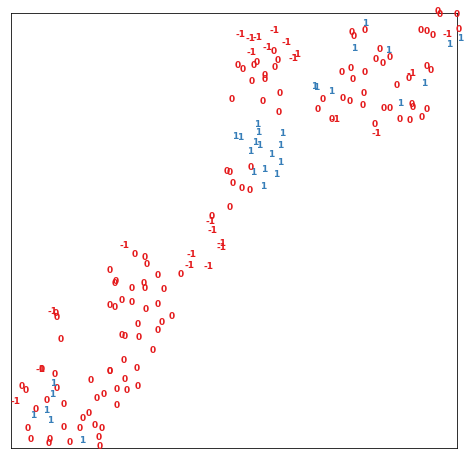

In [ ]:
'''t-SNE'''
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
X_tsne = tsne.fit_transform(cv_train_features_0)

print("Org data dimension is {}. Embedded data dimension is {}".format(cv_train_features_0.shape[-1], X_tsne.shape[-1]))

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(train_label_nums[i]), color=plt.cm.Set1(train_label_nums[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.001s...
[t-SNE] Computed neighbors for 177 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 37.030818
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.278015
[t-SNE] KL divergence after 700 iterations: 0.215040


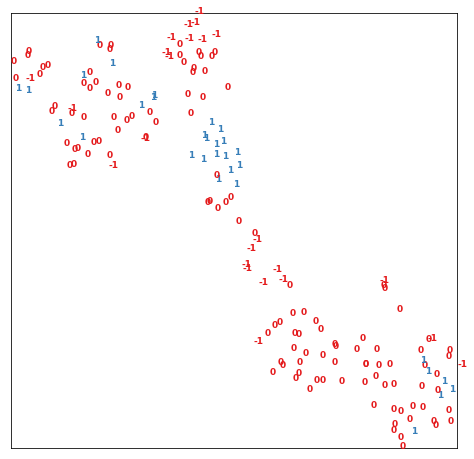

In [ ]:
#t-SNE
X_tsne = TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(cv_train_features_0)

#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(train_label_nums[i]), color=plt.cm.Set1(train_label_nums[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print(train_label_nums)
print(train_label_nums.shape)

train_label_nums_02 = train_label_nums

for i in range(train_label_nums_02.shape[0]):
  if train_label_nums_02[i] == -1:
    train_label_nums_02[i] = 2

print(train_label_nums_02)

[0 0 1 0 1 1 2 2 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 1 0 0 0 0 1 1 0 0
 0 1 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 1 0
 0 1 2 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 2 0 2 0 2 1 0 1 2 0 0 0 0 0 0
 0 1 2 2 0 0 2 1 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 2 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 2 0 0 2 2 0 0 0 0 1 0 0 2 0 2 1 0 0 0 1 0 0 0 0]
(177,)
[0 0 1 0 1 1 2 2 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 1 0 0 0 0 1 1 0 0
 0 1 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 1 0
 0 1 2 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 2 0 2 0 2 1 0 1 2 0 0 0 0 0 0
 0 1 2 2 0 0 2 1 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 2 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 2 0 0 2 2 0 0 0 0 1 0 0 2 0 2 1 0 0 0 1 0 0 0 0]


In [ ]:
train_label_nums

array([0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0,
       0])

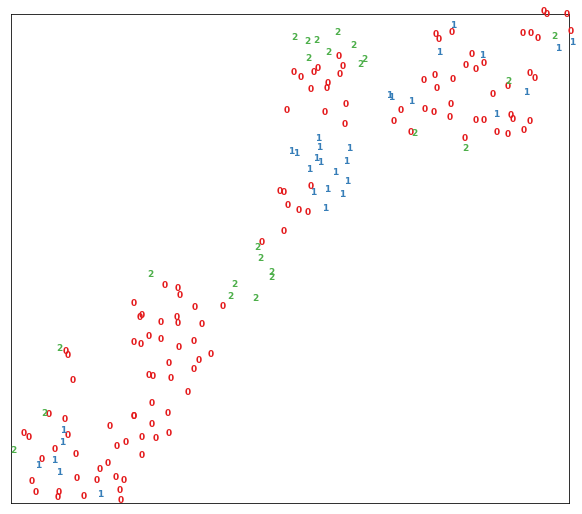

In [ ]:
#t-SNE

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019).fit_transform(cv_train_features_0)

#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize

plt.figure(figsize=(10, 9))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(train_label_nums[i]), color=plt.cm.Set1(train_label_nums_02[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 1296x720 with 0 Axes>

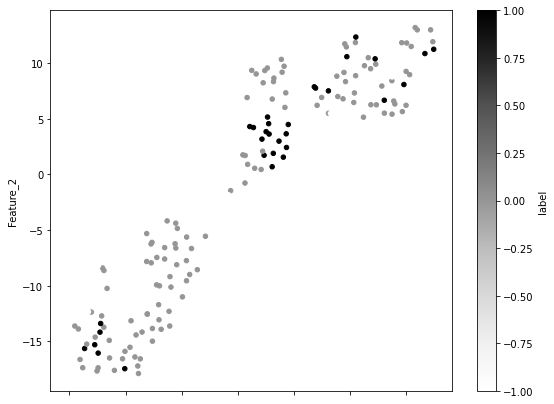

In [ ]:
import pandas

df = pandas.DataFrame(dict(Feature_1=X_tsne[:,0], Feature_2=X_tsne[:,1], label=train_label_nums))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', figsize=(9,7));

## t-SNE

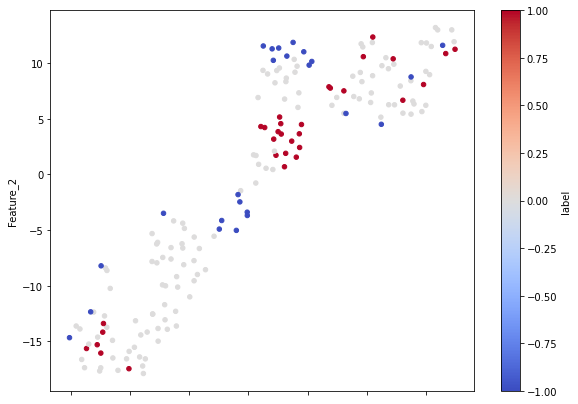

In [ ]:
import pandas
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
X_tsne = tsne.fit_transform(cv_train_features_0)

df = pandas.DataFrame(dict(Feature_1=X_tsne[:,0], Feature_2=X_tsne[:,1], label=train_label_nums))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='coolwarm', figsize=(9.5,7));

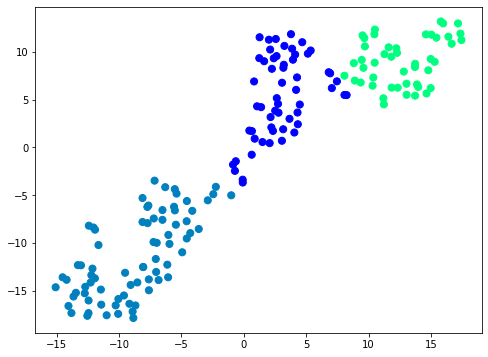

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
X_tsne = tsne.fit_transform(cv_train_features_0)

kmeans = KMeans(n_clusters=3, random_state=2020)
clusters = kmeans.fit_predict(X_tsne)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0],X_tsne[:,1], s=50, c=clusters, cmap='winter');

In [ ]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

labels = np.zeros_like(clusters)

for i in range(10):
  mask = (clusters == i)
  labels[mask] = mode(train_label_nums[mask])[0]

accuracy_score(train_label_nums, labels)

0.6892655367231638

## Isomap

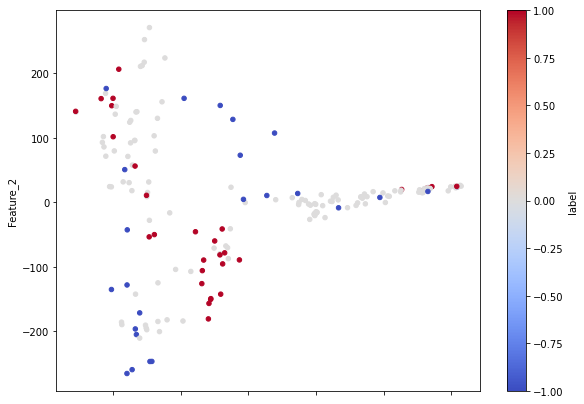

In [ ]:
import pandas
from sklearn.manifold import TSNE, Isomap

isomap = Isomap(n_components=2, n_jobs = 4, n_neighbors = 5)
X_isomap = isomap.fit_transform(cv_train_features_0)

df = pandas.DataFrame(dict(Feature_1=X_isomap[:,0], Feature_2=X_isomap[:,1], label=train_label_nums))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='coolwarm', figsize=(9.5,7));

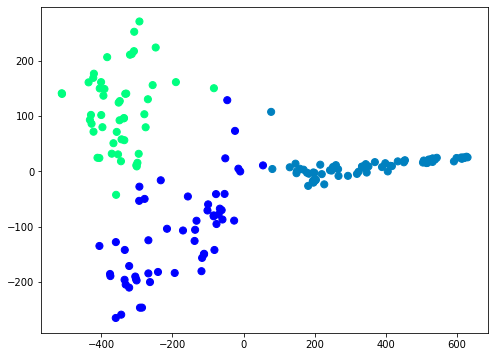

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=2020)
clusters = kmeans.fit_predict(X_isomap)

plt.figure(figsize=(8,6))
plt.scatter(X_isomap[:,0],X_isomap[:,1], s=50, c=clusters, cmap='winter');

In [ ]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

labels = np.zeros_like(clusters)

for i in range(10):
  mask = (clusters == i)
  labels[mask] = mode(train_label_nums[mask])[0]

accuracy_score(train_label_nums, labels)

0.6892655367231638

## linear PCA

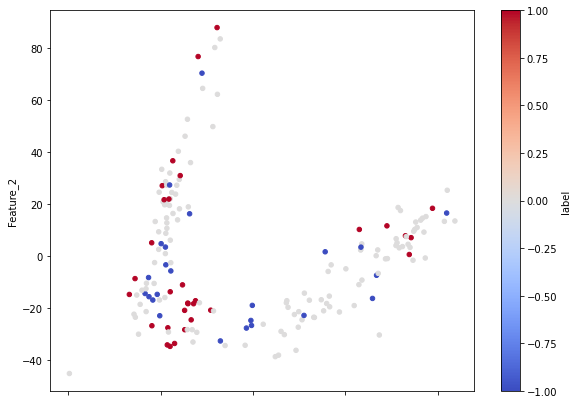

In [ ]:
import pandas
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="linear",n_components=2, gamma=None, random_state = 2019, n_jobs=1)
X_kpca = kpca.fit_transform(cv_train_features_0)

'''
kpca = KernelPCA(kernel='rbf', n_components=50) #  gamma=15
cv_train_features = kpca.fit_transform(cv_train_features_0)
cv_test_features = kpca.transform(cv_test_features_0)
'''

df = pandas.DataFrame(dict(Feature_1=X_kpca[:,0], Feature_2=X_kpca[:,1], label=train_label_nums))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='coolwarm', figsize=(9.5,7));

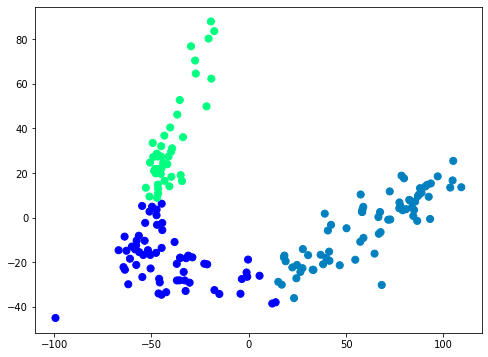

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=2020)
clusters = kmeans.fit_predict(X_kpca)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca[:,0],X_kpca[:,1], s=50, c=clusters, cmap='winter');

## poly PCA

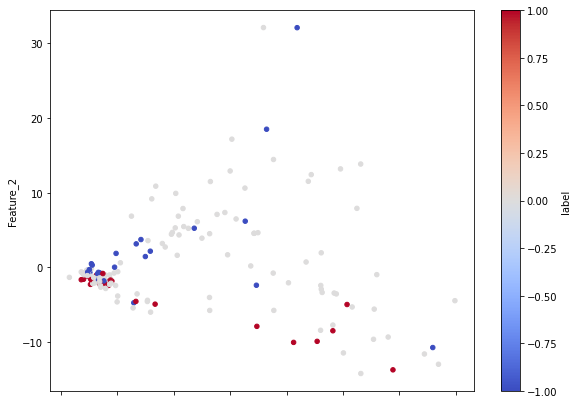

In [ ]:
import pandas
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="poly",n_components=2, gamma=None, random_state = 2019, n_jobs=1)
X_kpca = kpca.fit_transform(cv_train_features_0)

'''
kpca = KernelPCA(kernel='rbf', n_components=50) #  gamma=15
cv_train_features = kpca.fit_transform(cv_train_features_0)
cv_test_features = kpca.transform(cv_test_features_0)
'''

df = pandas.DataFrame(dict(Feature_1=X_kpca[:,0], Feature_2=X_kpca[:,1], label=train_label_nums))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='coolwarm', figsize=(9.5,7));

sigmoid PCA

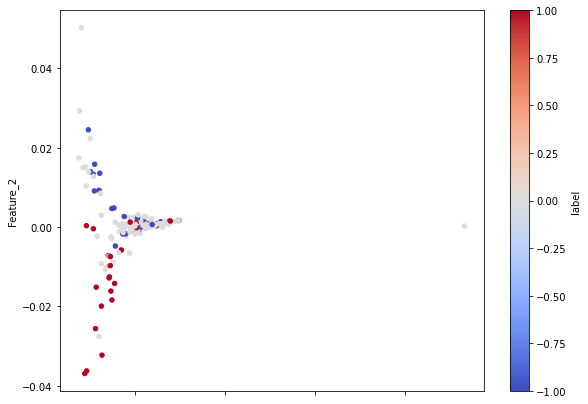

In [ ]:
import pandas
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="sigmoid",n_components=2, gamma=None, random_state = 2019, n_jobs=1)
X_kpca = kpca.fit_transform(cv_train_features_0)

'''
kpca = KernelPCA(kernel='rbf', n_components=50) #  gamma=15
cv_train_features = kpca.fit_transform(cv_train_features_0)
cv_test_features = kpca.transform(cv_test_features_0)
'''

df = pandas.DataFrame(dict(Feature_1=X_kpca[:,0], Feature_2=X_kpca[:,1], label=train_label_nums))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='coolwarm', figsize=(9.5,7));

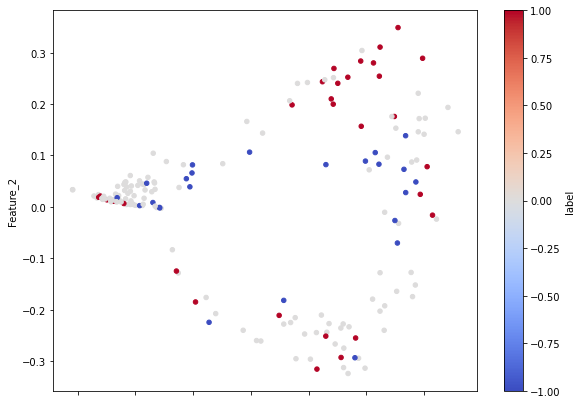

In [ ]:
import pandas
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="rbf",n_components=2, gamma=None, random_state = 2019, n_jobs=1)
X_kpca = kpca.fit_transform(cv_train_features_0)

'''
kpca = KernelPCA(kernel='rbf', n_components=50) #  gamma=15
cv_train_features = kpca.fit_transform(cv_train_features_0)
cv_test_features = kpca.transform(cv_test_features_0)
'''

df = pandas.DataFrame(dict(Feature_1=X_kpca[:,0], Feature_2=X_kpca[:,1], label=train_label_nums))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='coolwarm', figsize=(9.5,7));

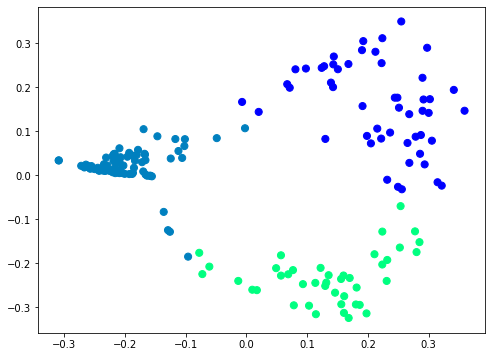

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=2020)
clusters = kmeans.fit_predict(X_kpca)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca[:,0],X_kpca[:,1], s=50, c=clusters, cmap='winter');

In [ ]:
print(clusters)
print(clusters.shape)

[1 1 1 2 0 0 0 0 2 1 1 1 0 2 1 1 1 2 0 0 1 1 1 0 2 1 0 1 2 2 1 0 1 0 1 0 0
 2 0 2 0 0 1 1 2 0 1 1 2 2 2 2 1 1 1 1 0 0 1 2 1 1 2 1 1 0 1 0 1 2 2 0 0 1
 0 0 1 1 1 1 2 0 1 0 1 2 0 1 1 1 1 0 0 1 2 2 0 1 0 1 1 0 1 0 1 1 1 2 0 2 1
 1 1 1 0 0 2 1 2 1 0 0 1 2 1 1 0 1 0 1 1 1 2 1 2 0 1 2 0 0 2 2 1 1 1 0 1 2
 2 1 0 0 2 2 1 1 0 2 1 1 1 1 1 1 0 1 0 2 2 0 2 2 1 1 1 1 2]
(177,)


In [ ]:
print(train_label_nums)
print(train_label_nums.shape)
print(train_label_nums.shape[0])

[ 0  0  1  0  1  1 -1 -1  0  0  0  0  1  0  0  0  0  0  1  1  0  0  0  0
  0  0  0 -1  1  0  0  0  0  1  1  0  0  0  1  0  0  1  1 -1  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0
  1  0  0  1 -1  0  0  0  0  1  0  1  0  1  0  0  1  0  0  0  1  0  0  0
 -1  0 -1  0 -1  1  0  1 -1  0  0  0  0  0  0  0  1 -1 -1  0  0 -1  1  0
  0  0  0  0 -1  0  0 -1 -1  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0
  0  0  0  0  0  0  0  1  0 -1  0  0 -1 -1  0  0  0  0  1  0  0 -1  0 -1
  1  0  0  0  1  0  0  0  0]
(177,)
177


In [ ]:
print(train_label_nums)
print(train_label_nums.shape)

train_label_nums_02 = train_label_nums

for i in range(train_label_nums_02.shape[0]):
  if train_label_nums_02[i] == -1:
    train_label_nums_02[i] = 2

print(train_label_nums_02)

[ 0  0  1  0  1  1 -1 -1  0  0  0  0  1  0  0  0  0  0  1  1  0  0  0  0
  0  0  0 -1  1  0  0  0  0  1  1  0  0  0  1  0  0  1  1 -1  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0
  1  0  0  1 -1  0  0  0  0  1  0  1  0  1  0  0  1  0  0  0  1  0  0  0
 -1  0 -1  0 -1  1  0  1 -1  0  0  0  0  0  0  0  1 -1 -1  0  0 -1  1  0
  0  0  0  0 -1  0  0 -1 -1  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0
  0  0  0  0  0  0  0  1  0 -1  0  0 -1 -1  0  0  0  0  1  0  0 -1  0 -1
  1  0  0  0  1  0  0  0  0]
(177,)
[0 0 1 0 1 1 2 2 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 1 0 0 0 0 1 1 0 0
 0 1 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 1 0
 0 1 2 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 2 0 2 0 2 1 0 1 2 0 0 0 0 0 0
 0 1 2 2 0 0 2 1 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 2 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 2 0 0 2 2 0 0 0 0 1 0 0 2 0 2 1 0 0 0 1 0 0 0 0]


In [ ]:
train_label_nums[mask]

array([ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,
        0, -1, -1, -1,  1,  0,  0,  0])

In [ ]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

labels = np.zeros_like(clusters)

for i in range(3):
  mask = (clusters == i)
  print(mask); print()
  labels[mask] = mode(train_label_nums_02[mask])[0]
  print(mode(train_label_nums_02[mask]))
  print(labels); print()
  print('-----------------------------')

accuracy_score(train_label_nums_02, labels)

[False False False False  True  True  True  True False False False False
  True False False False False False  True  True False False False  True
 False False  True False False False False  True False  True False  True
  True False  True False  True  True False False False  True False False
 False False False False False False False False  True  True False False
 False False False False False  True False  True False False False  True
  True False  True  True False False False False False  True False  True
 False False  True False False False False  True  True False False False
  True False  True False False  True False  True False False False False
  True False False False False False  True  True False False False False
  True  True False False False False  True False  True False False False
 False False False  True False False  True  True False False False False
 False  True False False False False  True  True False False False False
  True False False False False False False False  T

0.6892655367231638

In [ ]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<Figure size 1296x720 with 0 Axes>

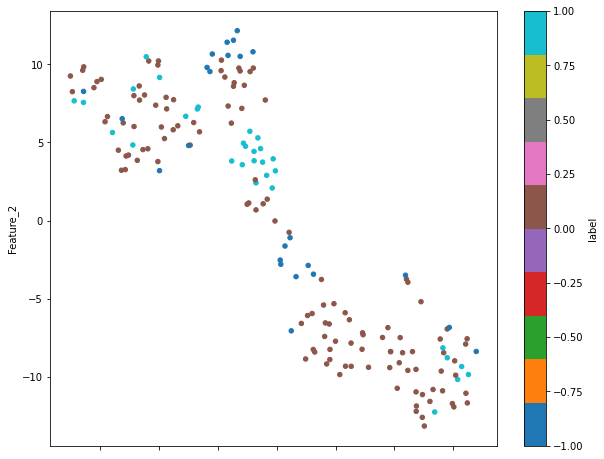

In [ ]:
import pandas

df = pandas.DataFrame(dict(Feature_1=X_tsne[:,0], Feature_2=X_tsne[:,1], label=train_label_nums))

plt.figure(figsize=(18,10))
df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='tab10', figsize=(10,8));

In [ ]:
param_grid = {'tf__ngram_range': [(1, 1)],
              'lr__C': [1e-5, 1e-4, 1e-2, 1e-1, 1, 10, 100, 1000]}
# 1e-5 | 
# 1e-4 |
# 1e-3 | 
# 1e-2 | 0.7683861082737486

# gamma=1e-05, C=100 | 0.8080952380952381 / 0.8192063492063493 / 0.8022222222222222

# 1    | 0.7741317671092951
# 10   | 0.7910495403472931
# 100  | 0.8077757916241062
# 1000 | 0.8136491317671093
# 10000| 0.7685776302349336

In [ ]:
'''
param_grid = {'tf__ngram_range': [(1, 1), (1, 2)],
              'clf__gamma': [1e-6, 1e-5, 1e-4, 1e-2, 1e-1, 1],
              'clf__C':[0.1,0.3,1,3,10,30,100,200,300]}
'''

In [ ]:
print(svc_tfidf_test_score)

0.7777777777777778


In [ ]:
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

svc_pipeline = Pipeline([('tf', CountVectorizer(binary=False, min_df=0.0, max_df=1.0)),
                        ('clf', SVC(kernel='rbf'))])

param_grid = {'tf__ngram_range': [(1, 1)],
              'clf__gamma': [1e-6, 1e-5, 1e-4, 1e-2, 1e-1, 1],
              'clf__C':[0.1,0.3,1,3,10,30,100,200,300]
}

gs_svc = GridSearchCV(svc_pipeline, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True), verbose=1)
gs_svc_2 = gs_svc.fit(train_corpus, train_label_nums)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.5min finished


In [ ]:
cv_results = gs_svc_2.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)[0:5]
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,cv score (mean),cv score (std)
37,1,"{'clf__C': 100, 'clf__gamma': 1e-05, 'tf__ngram_range': (1, 1)}",0.801746,0.042219
49,1,"{'clf__C': 300, 'clf__gamma': 1e-05, 'tf__ngram_range': (1, 1)}",0.801746,0.042219
43,1,"{'clf__C': 200, 'clf__gamma': 1e-05, 'tf__ngram_range': (1, 1)}",0.801746,0.042219
48,4,"{'clf__C': 300, 'clf__gamma': 1e-06, 'tf__ngram_range': (1, 1)}",0.796349,0.042985
31,5,"{'clf__C': 30, 'clf__gamma': 1e-05, 'tf__ngram_range': (1, 1)}",0.796190,0.046989


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma=1e-05, C=100)
svc.fit(cv_train_features, train_label_nums)
svc_tfidf_cv_scores = cross_val_score(svc, cv_train_features, train_label_nums, cv=5)
svc_tfidf_cv_mean_score = np.mean(svc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svc_tfidf_cv_scores)
print('Mean CV Accuracy:', svc_tfidf_cv_mean_score)
svc_tfidf_test_score = svc.score(cv_test_features, test_label_nums)
print('Test Accuracy:', svc_tfidf_test_score)

## 4. RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_ = np.zeros(10)
rfc = RandomForestClassifier(n_estimators=500, random_state=2020, criterion = "gini")

for i in range(10):

  rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)
  print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
  print('Mean CV Accuracy:', rfc_bow_cv_mean_score)

  train_[i] = rfc_bow_cv_mean_score

rfc.fit(cv_train_features, train_label_nums)
rfc_bow_test_score = rfc.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', rfc_bow_test_score)

CV Accuracy (5-fold): [0.77777778 0.66666667 0.74285714 0.68571429 0.74285714]
Mean CV Accuracy: 0.7231746031746032
CV Accuracy (5-fold): [0.72222222 0.69444444 0.68571429 0.71428571 0.74285714]
Mean CV Accuracy: 0.7119047619047618
CV Accuracy (5-fold): [0.72222222 0.72222222 0.68571429 0.77142857 0.74285714]
Mean CV Accuracy: 0.7288888888888889
CV Accuracy (5-fold): [0.75       0.75       0.68571429 0.74285714 0.68571429]
Mean CV Accuracy: 0.722857142857143
CV Accuracy (5-fold): [0.69444444 0.66666667 0.71428571 0.74285714 0.68571429]
Mean CV Accuracy: 0.7007936507936507
CV Accuracy (5-fold): [0.72222222 0.77777778 0.65714286 0.71428571 0.71428571]
Mean CV Accuracy: 0.7171428571428572
CV Accuracy (5-fold): [0.69444444 0.72222222 0.71428571 0.74285714 0.71428571]
Mean CV Accuracy: 0.7176190476190476
CV Accuracy (5-fold): [0.75       0.75       0.77142857 0.71428571 0.68571429]
Mean CV Accuracy: 0.7342857142857143
CV Accuracy (5-fold): [0.69444444 0.72222222 0.68571429 0.74285714 0.7142

In [ ]:
print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {rfc_bow_test_score:.4f}')

(10,)
<class 'numpy.ndarray'>
----------
Training accuracy (mean)   = 0.7181
Training accuracy (median) = 0.7174
----------
Test accuracy = 0.7111


## XGBoost

In [ ]:
from xgboost import XGBClassifier
train_ = np.zeros(10)
xgb = XGBClassifier(booster='gbtree', n_estimators=300, min_child_weight=1, gamma=0.5, subsample=0.8, colsample_bytree=0.6, max_depth=5,
                    learning_rate=0.1, verbosity=1, random_state=42)

for i in range(10):

  xgb_bow_cv_scores = cross_val_score(xgb, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  xgb_bow_cv_mean_score = np.mean(xgb_bow_cv_scores)
  print('CV Accuracy (5-fold):', xgb_bow_cv_scores)
  print('Mean CV Accuracy:', xgb_bow_cv_mean_score)

  train_[i] = xgb_bow_cv_mean_score

xgb.fit(cv_train_features, train_label_nums)
xgb_bow_test_score = xgb.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', xgb_bow_test_score)

CV Accuracy (5-fold): [0.77777778 0.91666667 0.85714286 0.8        0.82857143]
Mean CV Accuracy: 0.8360317460317459
CV Accuracy (5-fold): [0.80555556 0.80555556 0.88571429 0.88571429 0.8       ]
Mean CV Accuracy: 0.8365079365079365
CV Accuracy (5-fold): [0.88888889 0.80555556 0.88571429 0.8        0.85714286]
Mean CV Accuracy: 0.8474603174603172
CV Accuracy (5-fold): [0.83333333 0.88888889 0.8        0.8        0.82857143]
Mean CV Accuracy: 0.8301587301587301
CV Accuracy (5-fold): [0.83333333 0.86111111 0.94285714 0.85714286 0.8       ]
Mean CV Accuracy: 0.858888888888889
CV Accuracy (5-fold): [0.86111111 0.83333333 0.82857143 0.8        0.85714286]
Mean CV Accuracy: 0.8360317460317461
CV Accuracy (5-fold): [0.86111111 0.86111111 0.88571429 0.82857143 0.85714286]
Mean CV Accuracy: 0.8587301587301587
CV Accuracy (5-fold): [0.88888889 0.88888889 0.8        0.85714286 0.85714286]
Mean CV Accuracy: 0.8584126984126984
CV Accuracy (5-fold): [0.80555556 0.91666667 0.85714286 0.8        0.8   

In [ ]:
print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {xgb_bow_test_score:.4f}')

(10,)
<class 'numpy.ndarray'>
----------
Training accuracy (mean)   = 0.8457
Training accuracy (median) = 0.8420
----------
Test accuracy = 0.8222
